# Micro-Credit Defaulter Model 

### Problem Statement:  

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on.  

Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes. 

Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients. 

We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber.  

They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour.  

They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah).  

The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers.  

### Exercise: 

Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.   

## Data Description


#### label:- Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}
    
#### msisdn:- mobile number of user.
    
#### aon:- age on cellular network in days

#### daily_decr30:- aily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)

#### daily_decr90:- Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)

#### rental30:- Average main account balance over last 30 days	Unsure of given definition	

#### rental90:- Average main account balance over last 90 days	Unsure of given definition

#### last_rech_date_ma:- Number of days till last recharge of main account	

#### last_rech_date_da:- Number of days till last recharge of data account	

#### last_rech_amt_ma:-  Amount of last recharge of main account (in Indonesian Rupiah)

#### cnt_ma_rech30:-  Number of times main account got recharged in last 30 days.

#### fr_ma_rech30:-	Frequency of main account recharged in last 30 days	Unsure of given definition	

#### sumamnt_ma_rech30:- Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)

#### medianamnt_ma_rech30:-	Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)		

#### medianmarechprebal30:- Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)	
 
#### cnt_ma_rech90:-  Number of times main account got recharged in last 90 days		

#### fr_ma_rech90:-  Frequency of main account recharged in last 90 days	Unsure of given definition	

#### sumamnt_ma_rech90:-  Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)	

#### medianamnt_ma_rech90:-	Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)		

#### medianmarechprebal90:-	Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)		

#### cnt_da_rech30:- 	Number of times data account got recharged in last 30 days

#### fr_da_rech30:- 	Frequency of data account recharged in last 30 days	

#### cnt_da_rech90:-  Number of times data account got recharged in last 90 days	

#### fr_da_rech90:-  Frequency of data account recharged in last 90 days		

#### cnt_loans30:- Number of loans taken by user in last 30 days	

#### amnt_loans30:- Total amount of loans taken by user in last 30 days	

#### maxamnt_loans30:-  maximum amount of loan taken by the user in last 30 days	There are only two options: 5 & 10 Rs., for which the user needs to pay back 6 & 12 Rs. respectively.

#### medianamnt_loans30:- 	Median of amounts of loan taken by the user in last 30 days.

#### cnt_loans90:-  Number of loans taken by user in last 90 days	

#### amnt_loans90:- Total amount of loans taken by user in last 90 days		

#### maxamnt_loans90:- maximum amount of loan taken by the user in last 90 days	

#### medianamnt_loans90:- Median of amounts of loan taken by the user in last 90 days	

#### payback30:- Average payback time in days over last 30 days	

#### payback90:- Average payback time in days over last 90 days	

#### pcircle:- telecom circle	

#### pdate:- date		

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Inorder to view all the columns while printing we are setting an option to display the maximum columns and rows
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
## importing the data
df = pd.read_csv("Data file.csv")
print("We have {} Rows and {} Columns in our dataframe".format(df.shape[0], df.shape[1])) # checking the shape

## We can see there are more than 2 lakhs rows of data and 37 columns

We have 209593 Rows and 37 Columns in our dataframe


In [4]:
## looking at the first 5 rows 
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [5]:
## looking at the last 5 rows 
df.tail()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.0,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.0,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.0,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.0,10.500000,UPW,2016-07-25
209592,209593,1,65061I85339,1581.0,4489.362000,4534.820000,483.92,631.20,13.0,0.0,7526,2,1.0,9065.0,4532.5,356.70,3,19,16591,7526.0,392.20,0.0,0.0,0,0,2,18,12.0,0.0,2.0,18,12,0.0,0.0,0.000000,UPW,2016-07-07


## EDA and Data Cleaning

In [6]:
## lookiing at the columns
df.columns

## There is an unkown column
## it has all unique values let's drop it

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [7]:
## dropping the unnamed column
df.drop('Unnamed: 0',axis=1,inplace=True)
df.shape

(209593, 36)

In [8]:
## Now let's look at the number of unique values in each column
for i in df.columns:
    print('No. of unique values in',i.upper() ,'are',len(df[i].unique()))

No. of unique values in LABEL are 2
No. of unique values in MSISDN are 186243
No. of unique values in AON are 4507
No. of unique values in DAILY_DECR30 are 147025
No. of unique values in DAILY_DECR90 are 158669
No. of unique values in RENTAL30 are 132148
No. of unique values in RENTAL90 are 141033
No. of unique values in LAST_RECH_DATE_MA are 1186
No. of unique values in LAST_RECH_DATE_DA are 1174
No. of unique values in LAST_RECH_AMT_MA are 70
No. of unique values in CNT_MA_RECH30 are 71
No. of unique values in FR_MA_RECH30 are 1083
No. of unique values in SUMAMNT_MA_RECH30 are 15141
No. of unique values in MEDIANAMNT_MA_RECH30 are 510
No. of unique values in MEDIANMARECHPREBAL30 are 30428
No. of unique values in CNT_MA_RECH90 are 110
No. of unique values in FR_MA_RECH90 are 89
No. of unique values in SUMAMNT_MA_RECH90 are 31771
No. of unique values in MEDIANAMNT_MA_RECH90 are 608
No. of unique values in MEDIANMARECHPREBAL90 are 29785
No. of unique values in CNT_DA_RECH30 are 1066
No.

In [9]:
## We can see pcircle has only one value 
## let's see the column
df['pcircle'].value_counts()

## So, let's drop this as well
df.drop('pcircle',axis=1,inplace=True)
df.shape
## Looking at the shape again we can see it changed

(209593, 35)

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pdate                   0
dtype: int64


<AxesSubplot:>

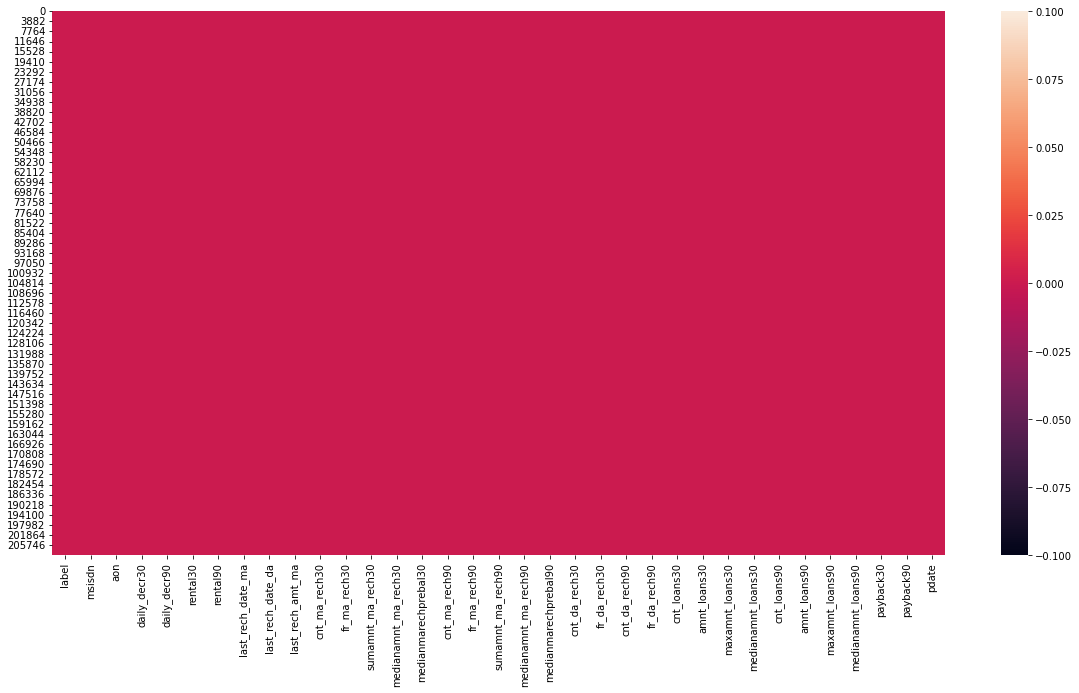

In [10]:
## Checking missing values
print(df.isnull().sum())

## making a visual
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull())

## There are no null values

In [11]:
## looking at the data info
df.info()

## we can see most of the feature are float or int datatype 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [12]:
# checking if any other column has blank values(' '),special characters(?,-,_) etc to make sure the data is clean

special_chars =[" ","?","-"," ?"," -","? ","- "," ? "," - ","NA","N/A"," NA"," N/A"] # making list of possible special characters 

for col in df.columns:
    for char in special_chars:
        print(f"{char} in {col} = ",end= " ")
        print((df[col] == char).sum())
        
# We can observe that there are no special characters in the data

  in label =  0
? in label =  0
- in label =  0
 ? in label =  0
 - in label =  0
?  in label =  0
-  in label =  0
 ?  in label =  0
 -  in label =  0
NA in label =  0
N/A in label =  0
 NA in label =  0
 N/A in label =  0
  in msisdn =  0
? in msisdn =  0
- in msisdn =  0
 ? in msisdn =  0
 - in msisdn =  0
?  in msisdn =  0
-  in msisdn =  0
 ?  in msisdn =  0
 -  in msisdn =  0
NA in msisdn =  0
N/A in msisdn =  0
 NA in msisdn =  0
 N/A in msisdn =  0
  in aon =  0
? in aon =  0
- in aon =  0
 ? in aon =  0
 - in aon =  0
?  in aon =  0
-  in aon =  0
 ?  in aon =  0
 -  in aon =  0
NA in aon =  0
N/A in aon =  0
 NA in aon =  0
 N/A in aon =  0
  in daily_decr30 =  0
? in daily_decr30 =  0
- in daily_decr30 =  0
 ? in daily_decr30 =  0
 - in daily_decr30 =  0
?  in daily_decr30 =  0
-  in daily_decr30 =  0
 ?  in daily_decr30 =  0
 -  in daily_decr30 =  0
NA in daily_decr30 =  0
N/A in daily_decr30 =  0
 NA in daily_decr30 =  0
 N/A in daily_decr30 =  0
  in daily_decr90 =  0
? i

In [13]:
# Checking duplicates if any
duplicates = df[df.duplicated()]
print(duplicates) ## we can see there is only one duplicate row
print('Shape Before dropping:- ',df.shape)

## let's drop it
df.drop_duplicates(inplace=True)
print('Shape After dropping:- ',df.shape)


        label       msisdn    aon  daily_decr30  daily_decr90  rental30  \
198194      1  82741I90849  367.0   3136.666667   3136.666667   3320.95   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
198194   3320.95                1.0                0.0               770   

        cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
198194              5           1.0             8666.0                1539.0   

        medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
198194                  96.0              5             1               8666   

        medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
198194                1539.0                  96.0            0.0   

        fr_da_rech30  cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  \
198194           0.0              0             0            4            24   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \


In [14]:
## let's check the statistical summary of the features
df.describe().T

## We can clearly see some of the features are highly skewed and contain outliers as well.
## We concluded the above by seeing the data distribution in the 75% to the max is significantly high

,count,mean,std,min,25%,50%,75%,max
label,209592.0,0.875177,0.330519,0.000000,1.000000,1.000000,1.0000,1.000000
aon,209592.0,8112.380399,75696.261220,-48.000000,246.000000,527.000000,982.0000,999860.755168
daily_decr30,209592.0,5381.412999,9220.644093,-93.012667,42.439500,1469.091833,7244.0960,265926.000000
daily_decr90,209592.0,6082.529123,10918.836919,-93.012667,42.691917,1500.000000,7802.7950,320630.000000
rental30,209592.0,2692.578912,4308.596841,-23737.140000,280.417500,1083.540000,3356.9450,198926.110000
rental90,209592.0,3483.407309,5770.475034,-24720.580000,300.260000,1334.000000,4201.7925,200148.110000
last_rech_date_ma,209592.0,3755.865715,53906.020204,-29.000000,1.000000,3.000000,7.0000,998650.377733
last_rech_date_da,209592.0,3712.220632,53374.960145,-29.000000,0.000000,0.000000,0.0000,999171.809410
last_rech_amt_ma,209592.0,2064.458973,2370.790003,0.000000,770.000000,1539.000000,2309.0000,55000.000000
cnt_ma_rech30,209592.0,3.978053,4.256099,0.000000,1.000000,3.000000,5.0000,203.000000


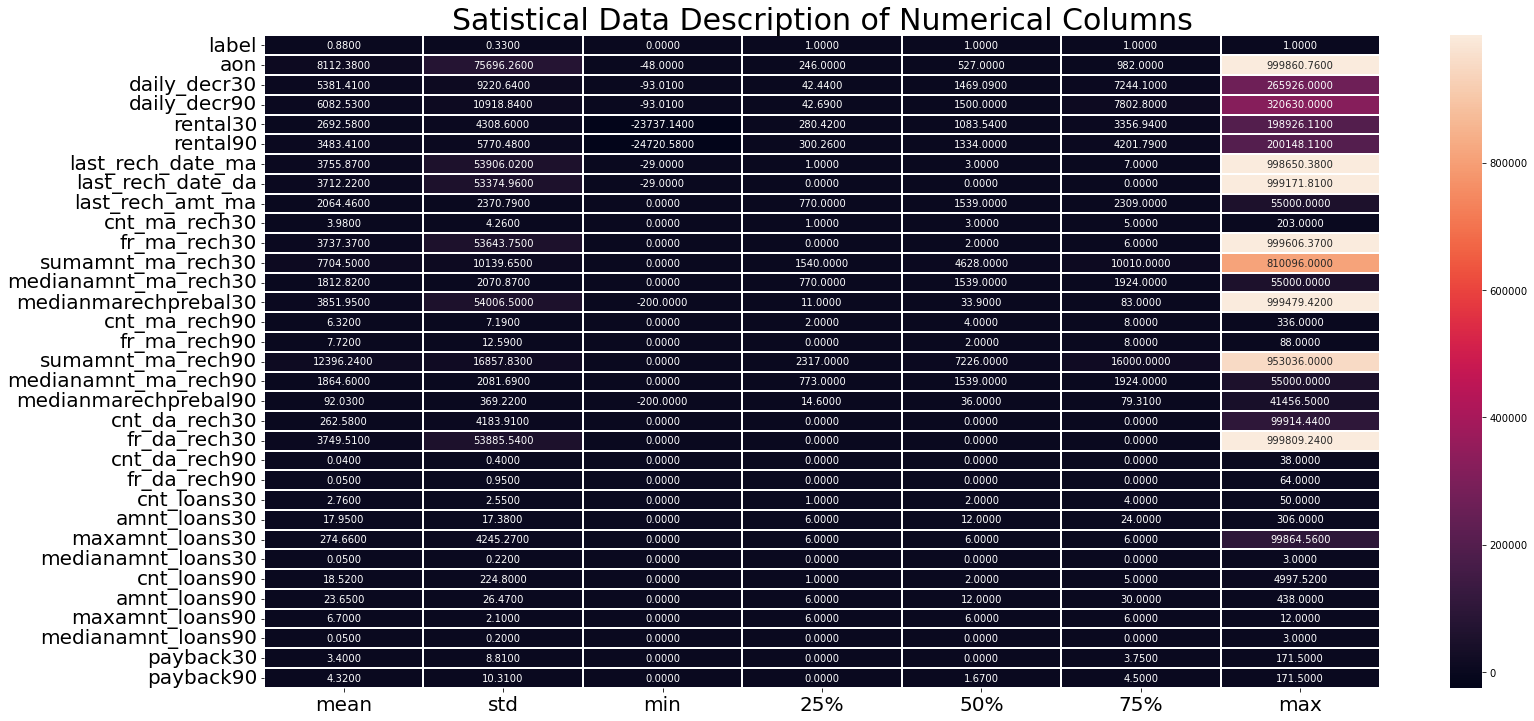

In [15]:
## Visualizing the stats summary by using a heatmap
# visualizing the statistical description of numeric datatype columns

plt.figure(figsize = (25,12))
sns.heatmap(round(df.describe()[1:].transpose(),2), linewidth = 2, annot= True, fmt = ".4f")
plt.title("Satistical Data Description of Numerical Columns",fontsize=30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

## We can clearly see the lighter shades of the max values for some columns which represents that there are outliers and skeweness

In [16]:
### looking at the object columns
df.describe(include='O').T

,count,unique,top,freq
msisdn,209592,186243,04581I85330,7
pdate,209592,82,2016-07-04,3150


### Univariate Analysis

In [17]:
# lets seperate the categorical variables
cat_cols = df.dtypes[df.dtypes == 'object'].index.tolist()
cat_cols

## Lets seperate the floating point/ continuous variables
cont_cols = df.dtypes[df.dtypes == 'float64'].index.tolist()
cont_cols

## Lets seperate the floating point variables
discrete_cols = df.dtypes[df.dtypes == 'int64'].index.tolist()
discrete_cols

['label',
 'last_rech_amt_ma',
 'cnt_ma_rech30',
 'cnt_ma_rech90',
 'fr_ma_rech90',
 'sumamnt_ma_rech90',
 'cnt_da_rech90',
 'fr_da_rech90',
 'cnt_loans30',
 'amnt_loans30',
 'amnt_loans90',
 'maxamnt_loans90']

#### Let's build  count plots

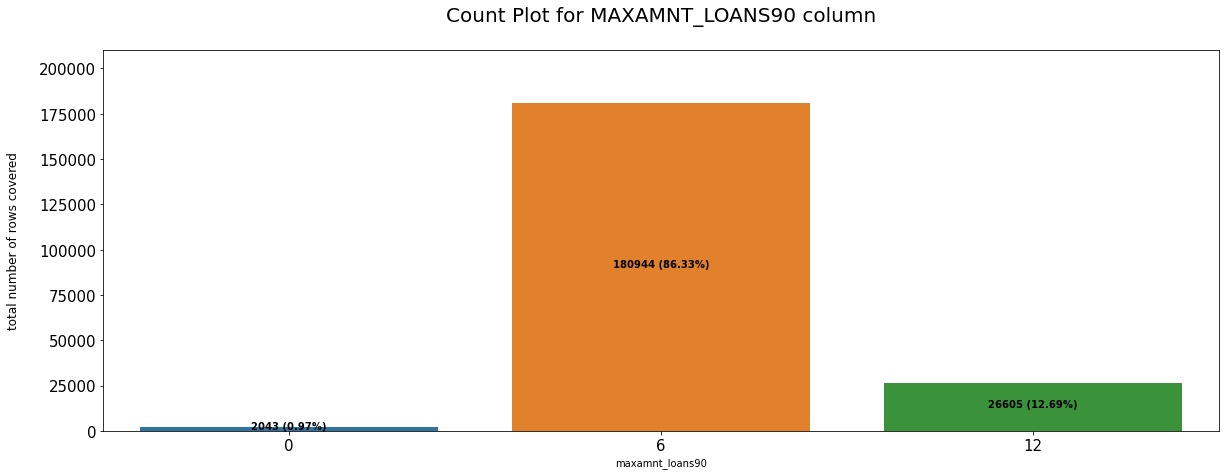

In [18]:
try:
    x = 'maxamnt_loans90'
    k=0
    plt.figure(figsize=[20,7])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,210000)
    plt.title(f'Count Plot for {x.upper()} column\n',fontsize=20)
    plt.ylabel(f'total number of rows covered\n',fontsize=12)
    plt.yticks(fontsize = 15)
    plt.xticks(fontsize = 15)
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass


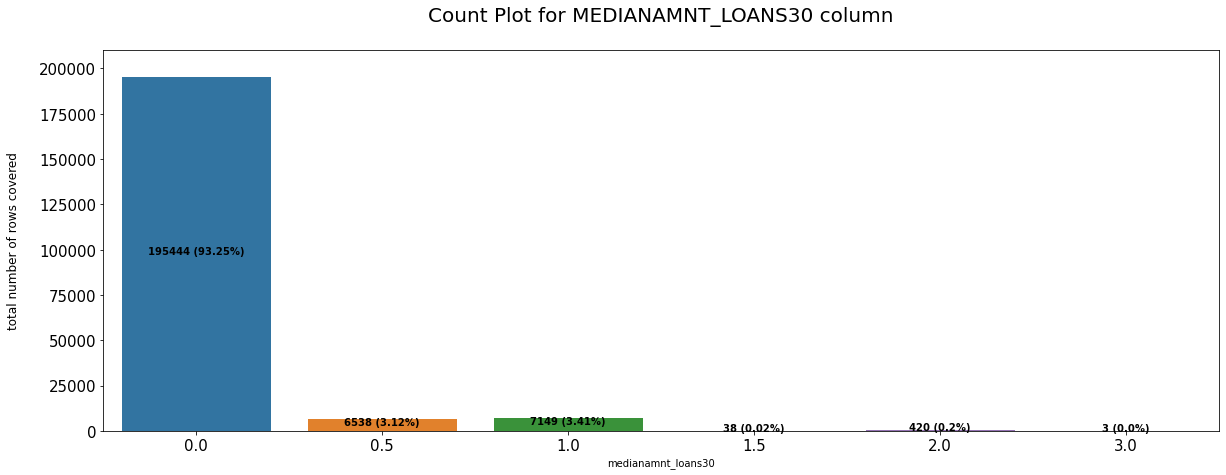

In [19]:
try:
    x = 'medianamnt_loans30'
    k=0
    plt.figure(figsize=[20,7])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,210000)
    plt.title(f'Count Plot for {x.upper()} column\n',fontsize=20)
    plt.ylabel(f'total number of rows covered\n',fontsize=12)
    plt.yticks(fontsize = 15)
    plt.xticks(fontsize = 15)
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

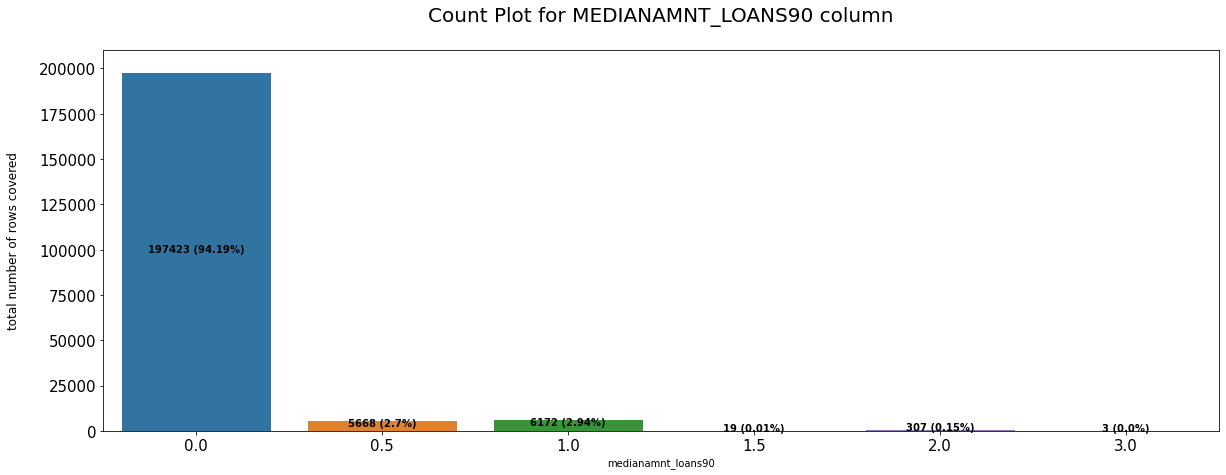

In [20]:
try:
    x = 'medianamnt_loans90'
    k=0
    plt.figure(figsize=[20,7])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,210000)
    plt.title(f'Count Plot for {x.upper()} column\n',fontsize=20)
    plt.ylabel(f'total number of rows covered\n',fontsize=12)
    plt.yticks(fontsize = 15)
    plt.xticks(fontsize = 15)
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

In the above count plots we can see the categories present in the columns along with the percentage and number of rows covered by each unique value of that column in our dataset.

### Bivariate Analysis

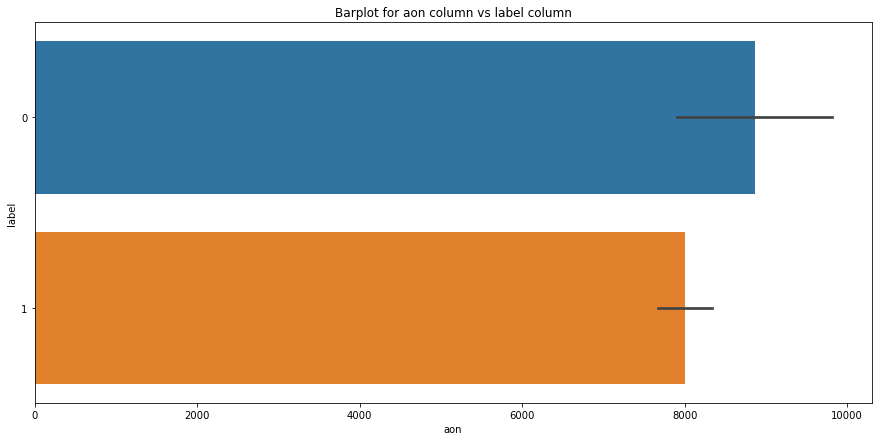

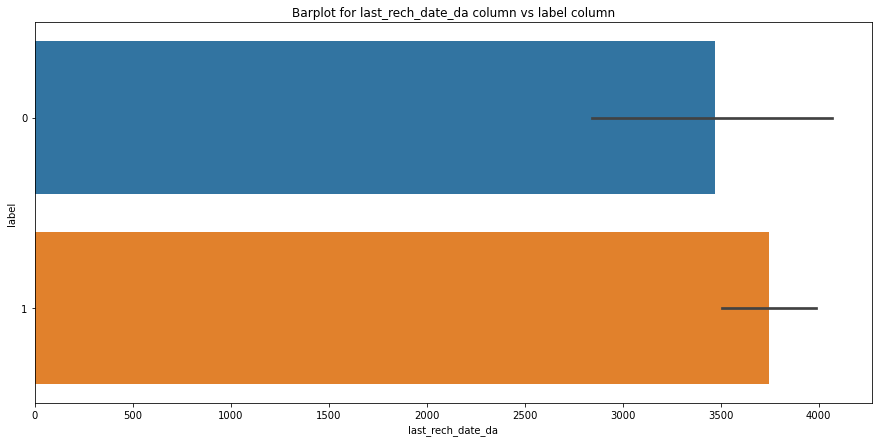

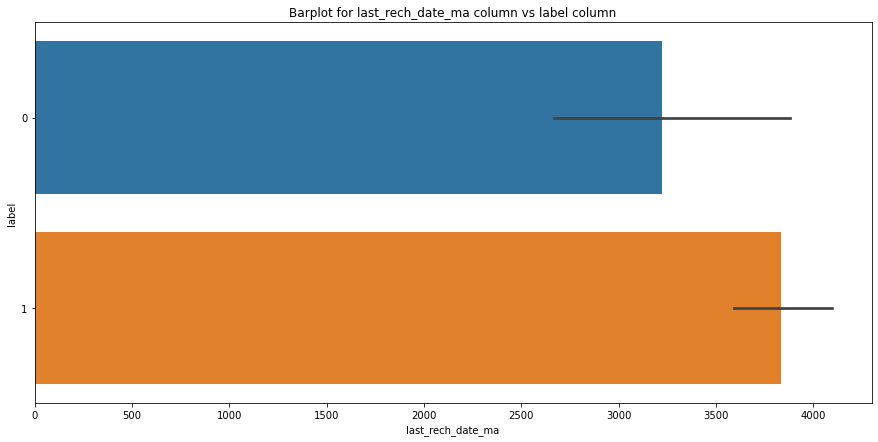

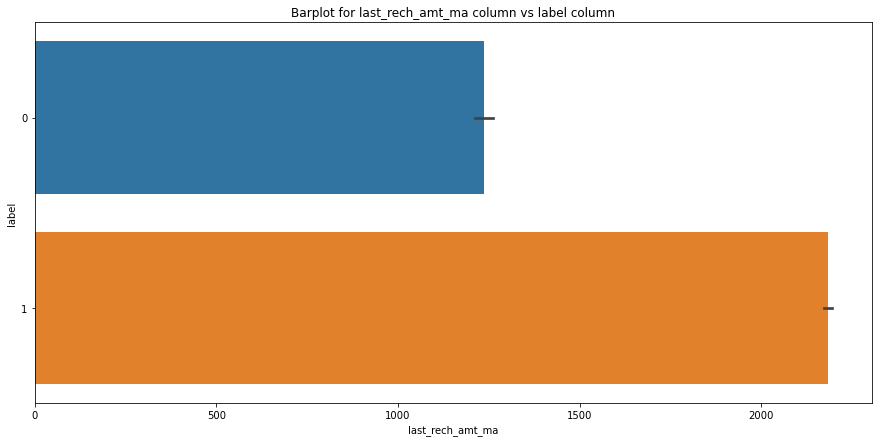

In [21]:
y = 'label'

x = 'aon'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

x = 'last_rech_date_da'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

x = 'last_rech_date_ma'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

x = 'last_rech_amt_ma'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

The above bar plots show the success and failure in returning the credit amount by a user depending on the specified feature columns.

<AxesSubplot:xlabel='msisdn'>

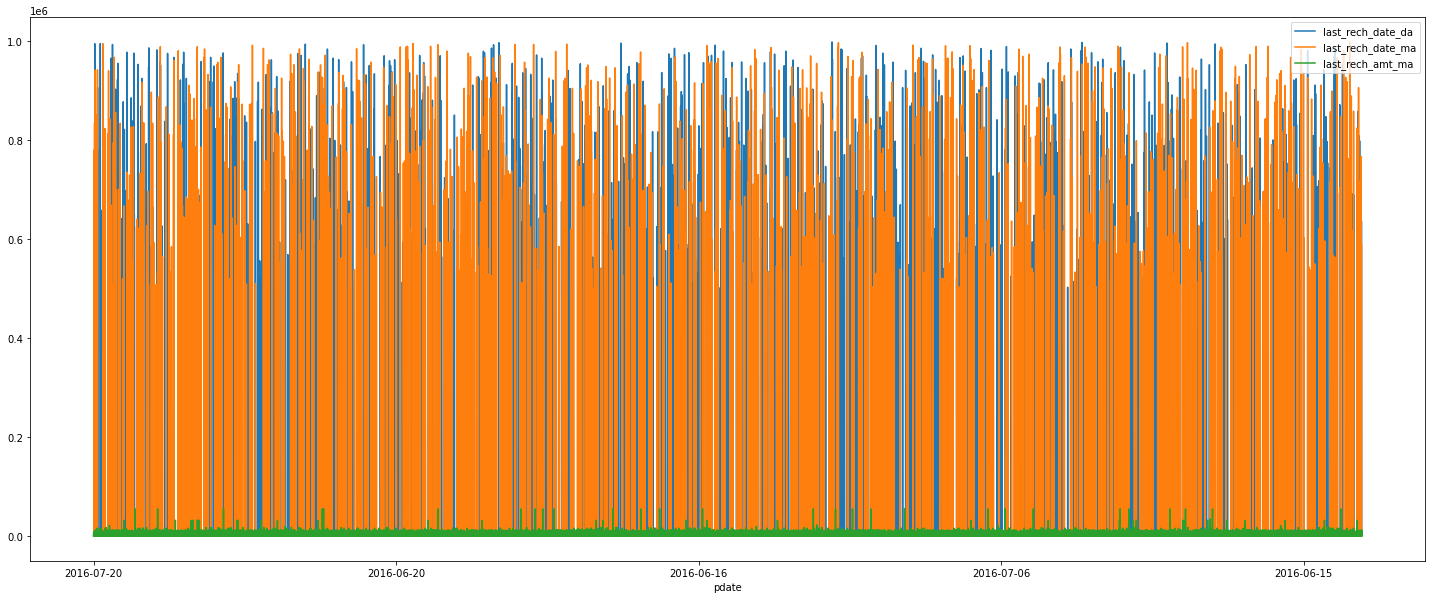

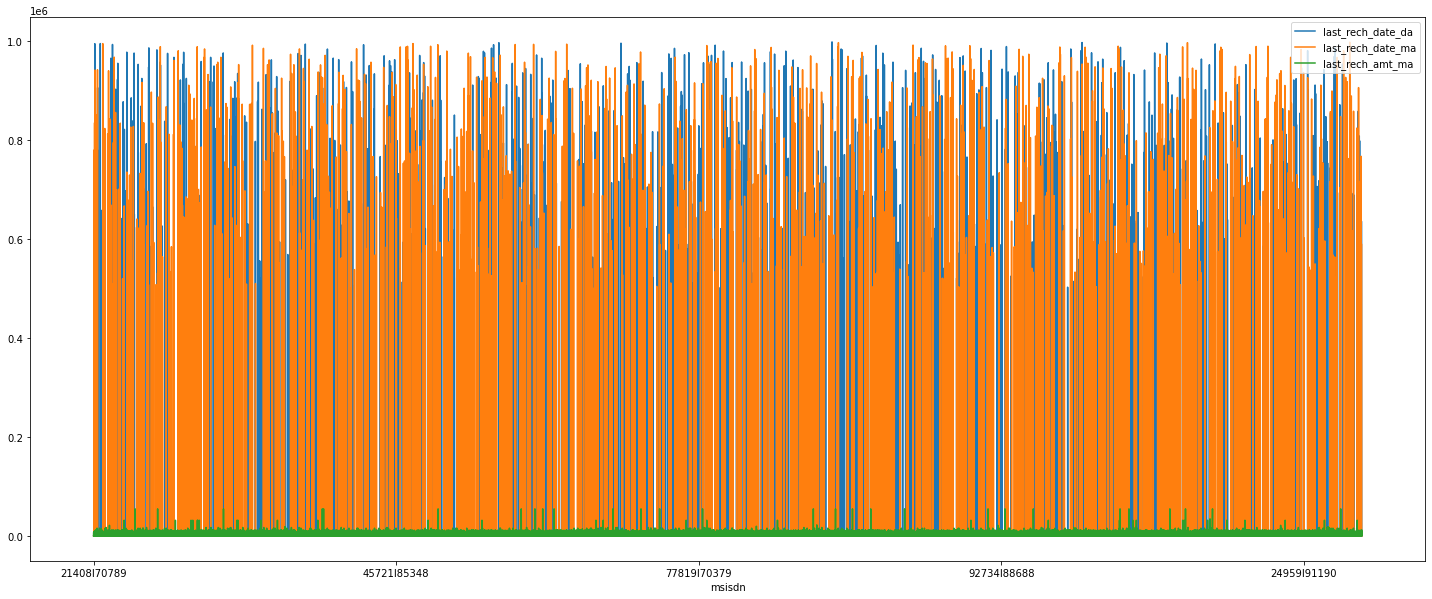

In [22]:
df.plot(kind="line", x="pdate", y=["last_rech_date_da", "last_rech_date_ma", "last_rech_amt_ma"], figsize=[25,10])

df.plot(kind="line", x="msisdn", y=["last_rech_date_da", "last_rech_date_ma", "last_rech_amt_ma"], figsize=[25,10])

Here we have line plots for date and mobile number data with respect to daily and monthly recharge information along with the amount factor.

<AxesSubplot:xlabel='sumamnt_ma_rech30', ylabel='sumamnt_ma_rech90'>

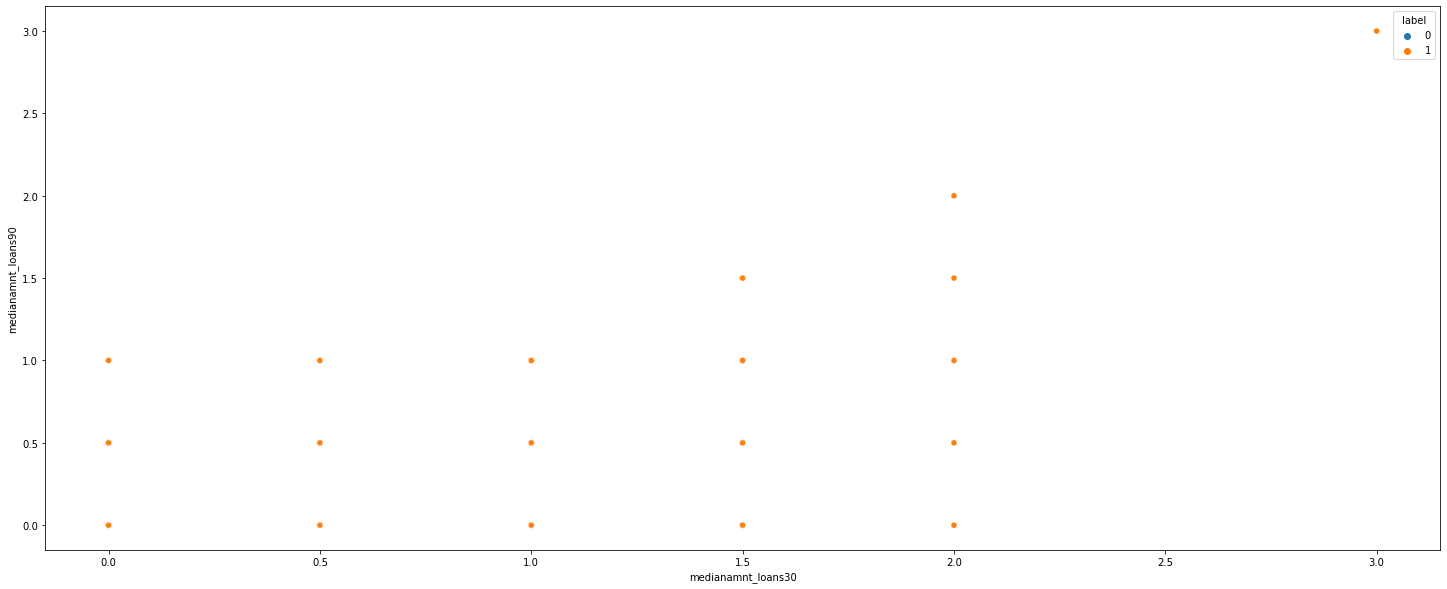

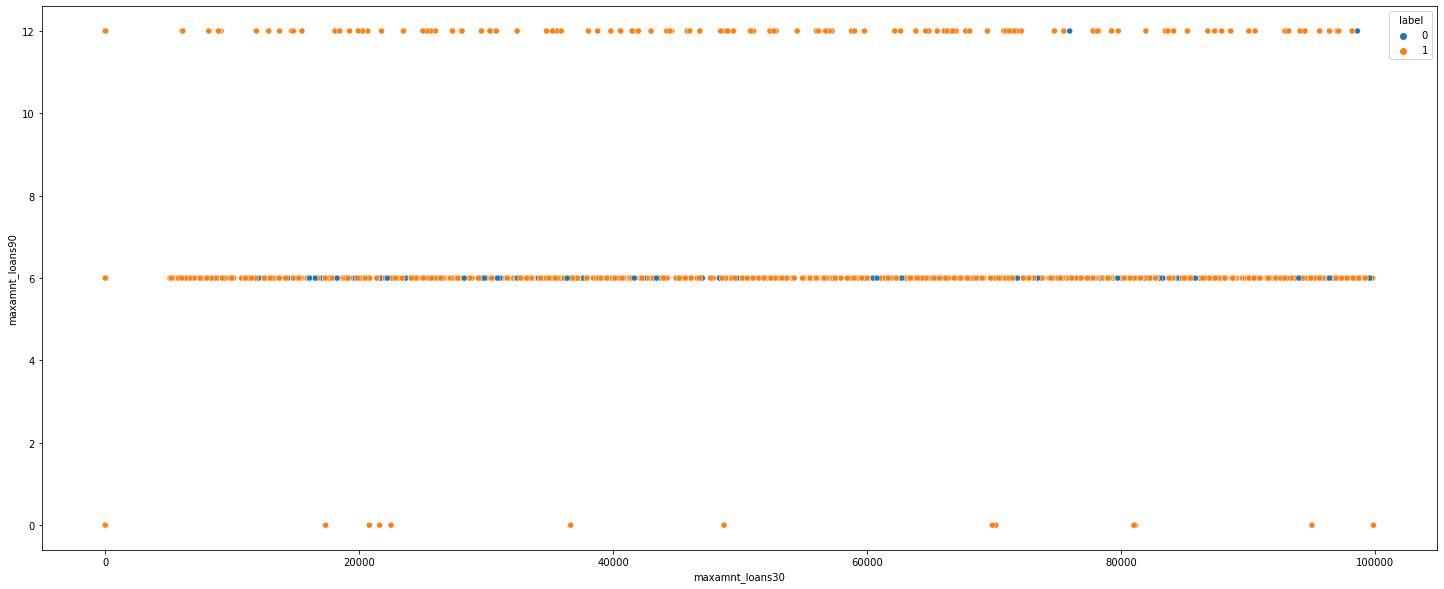

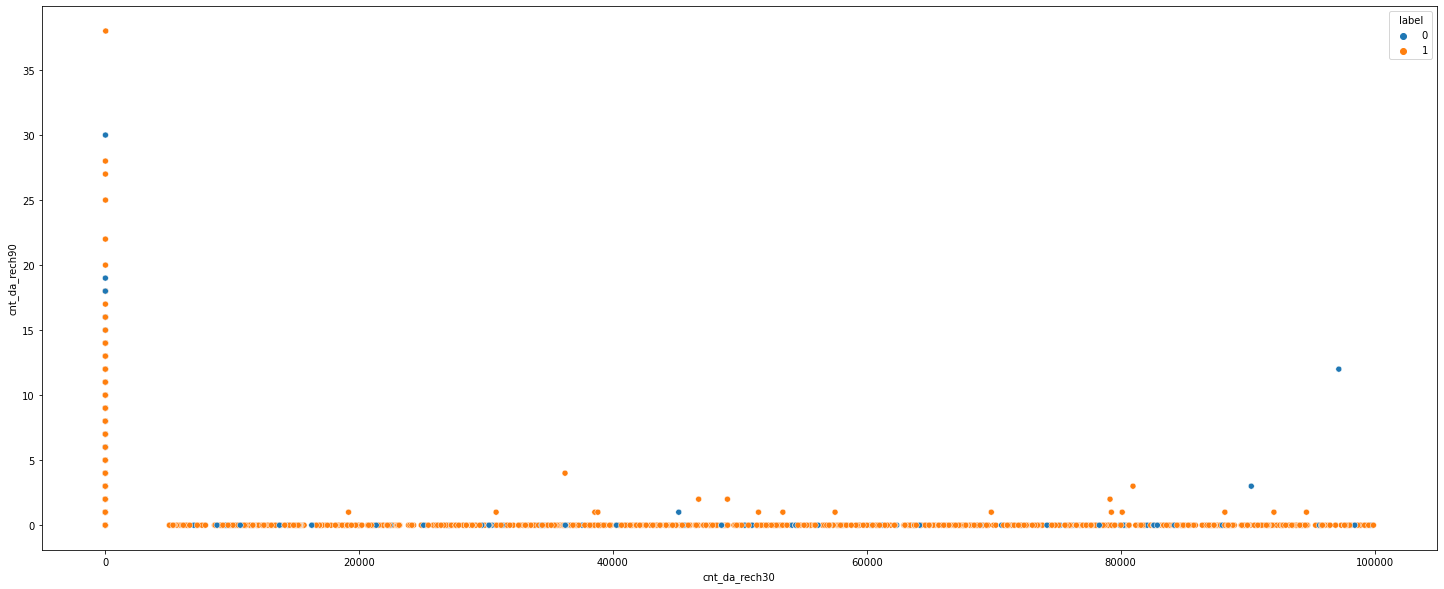

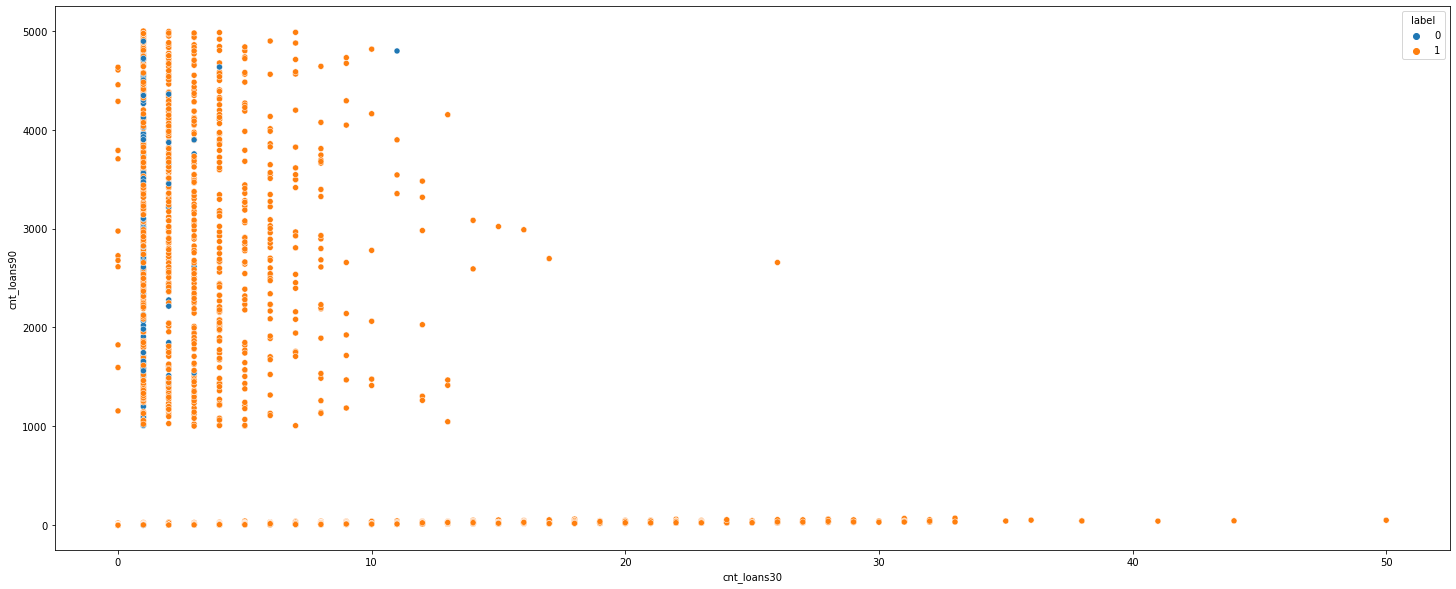

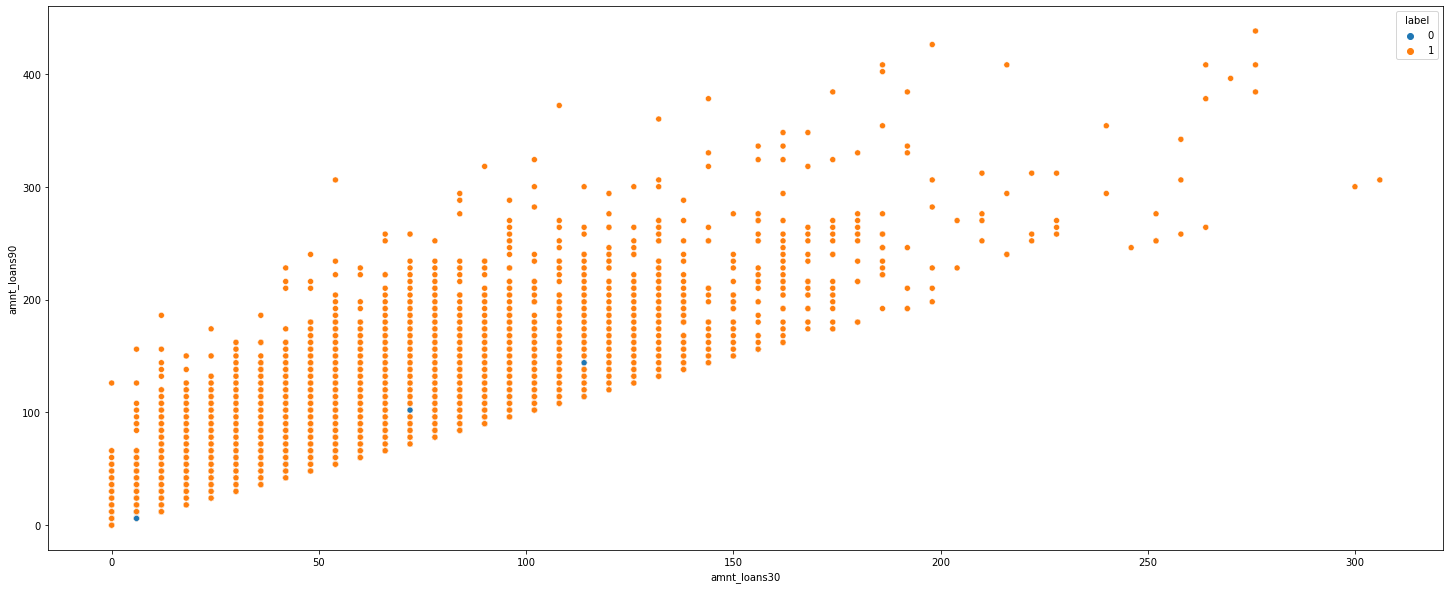

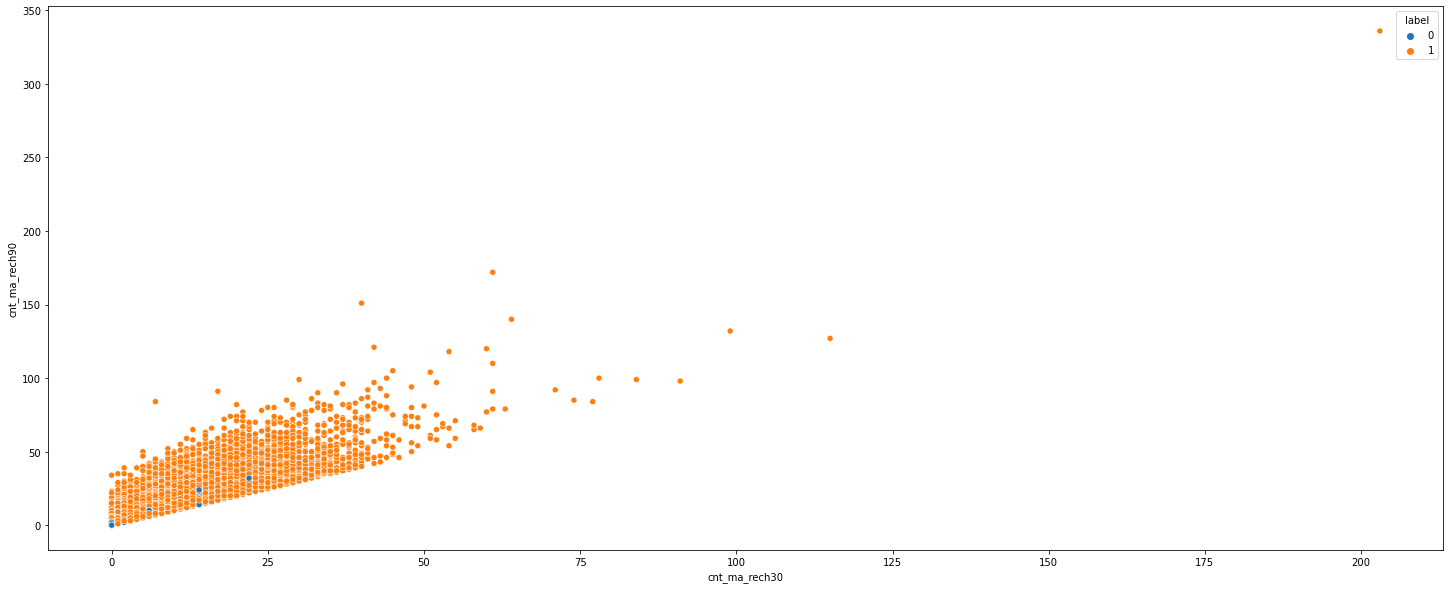

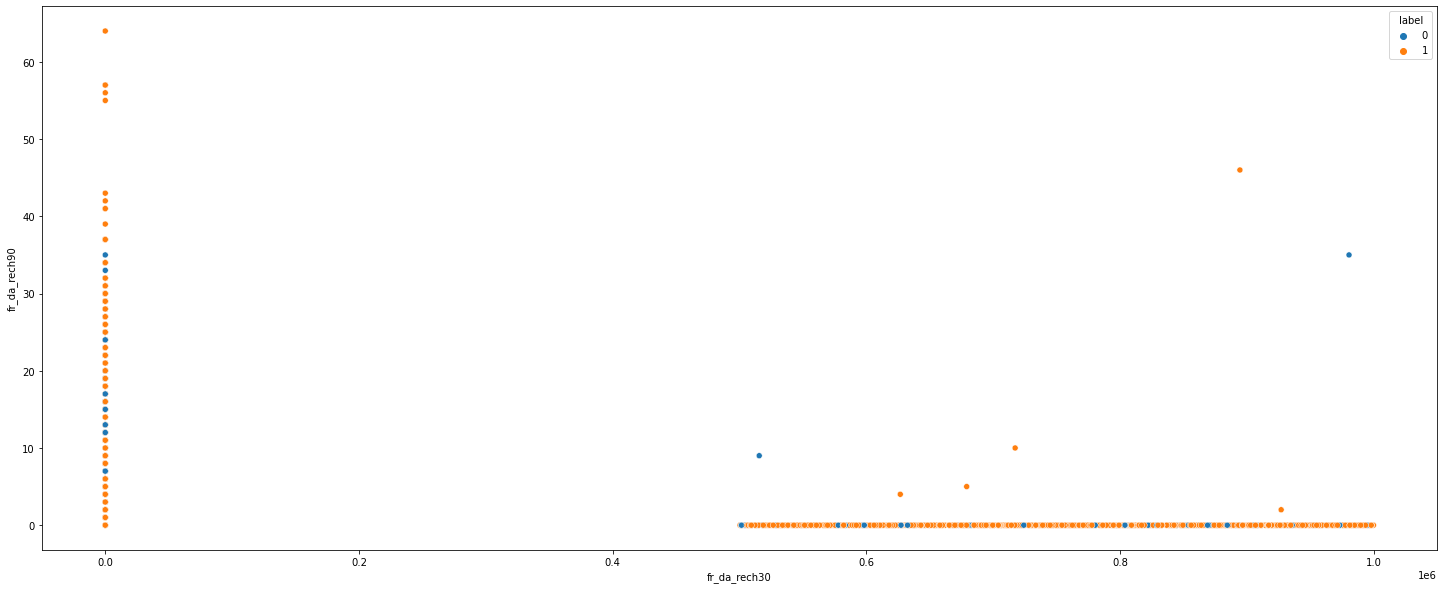

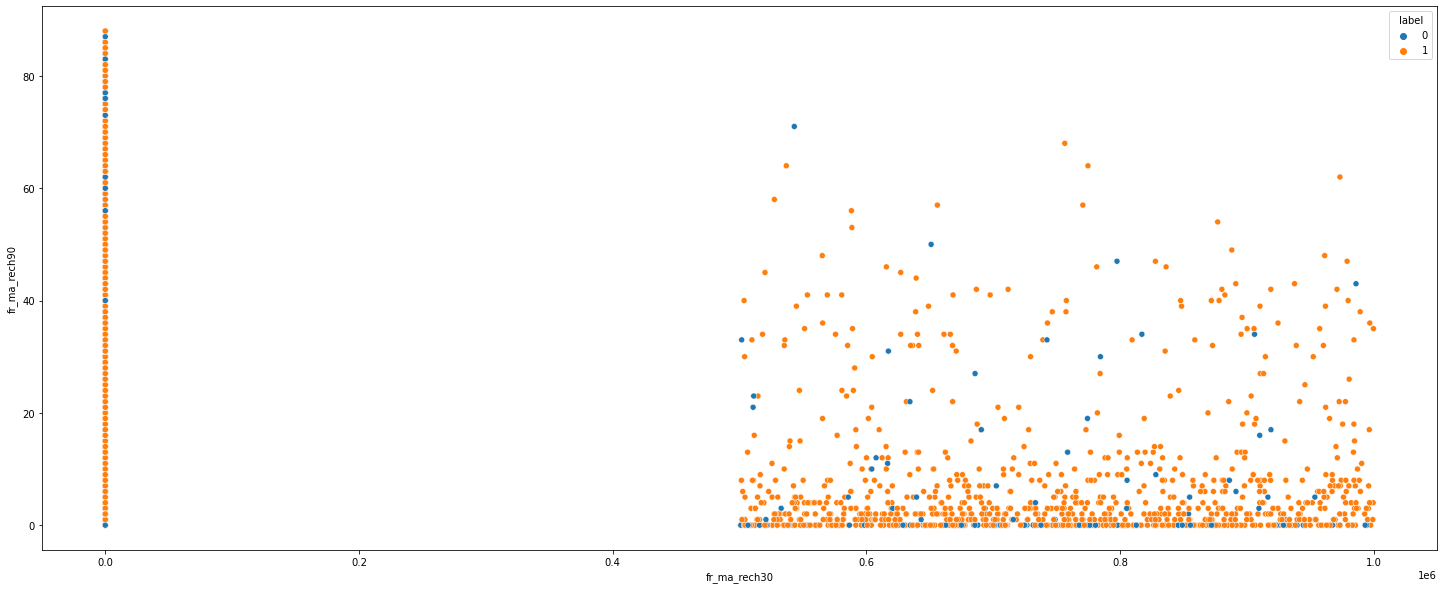

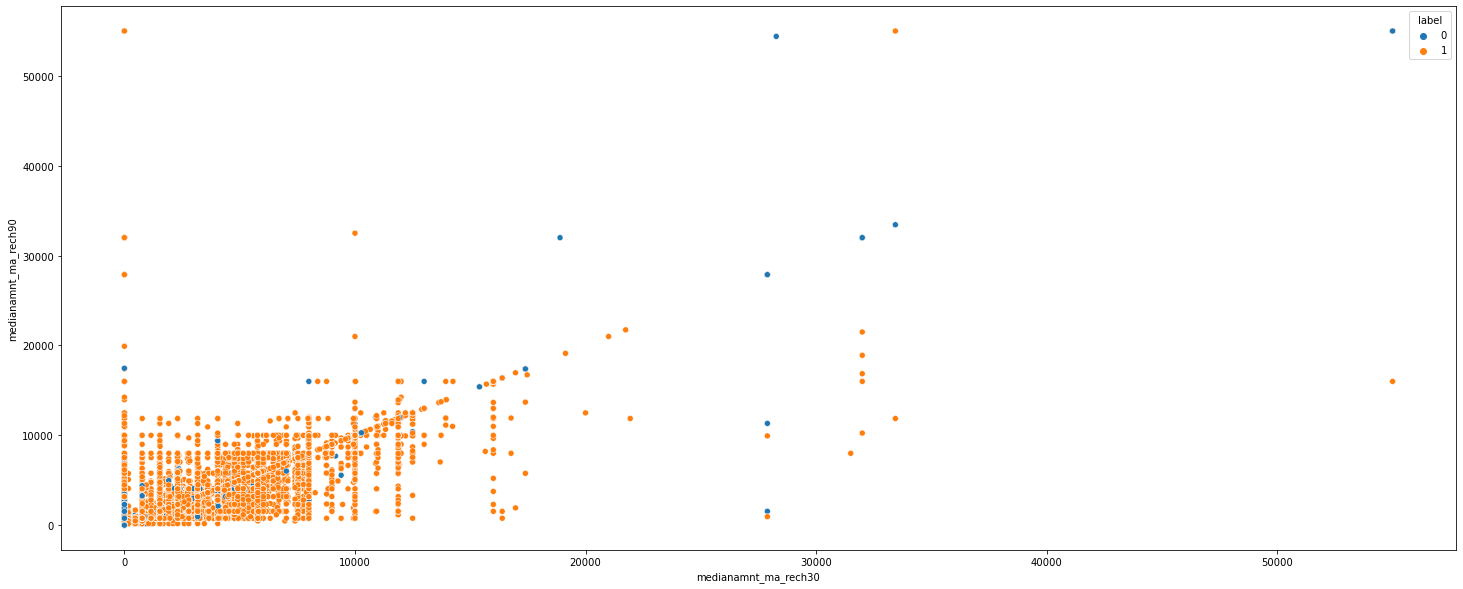

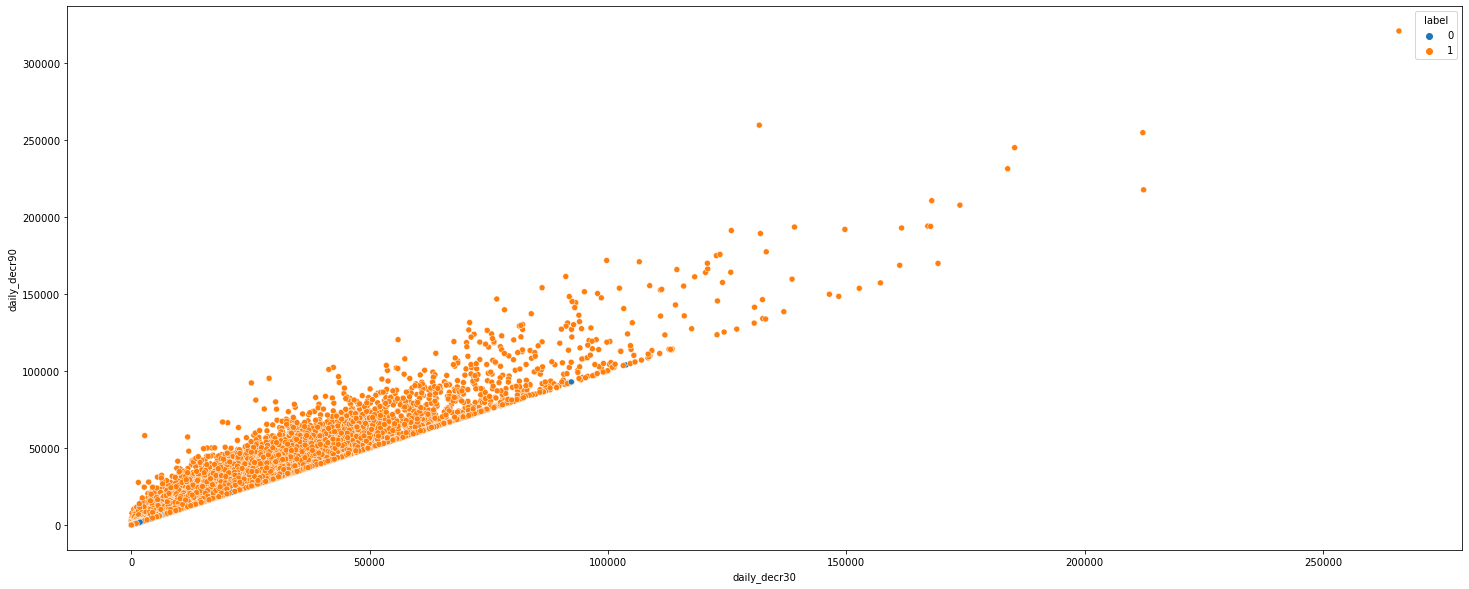

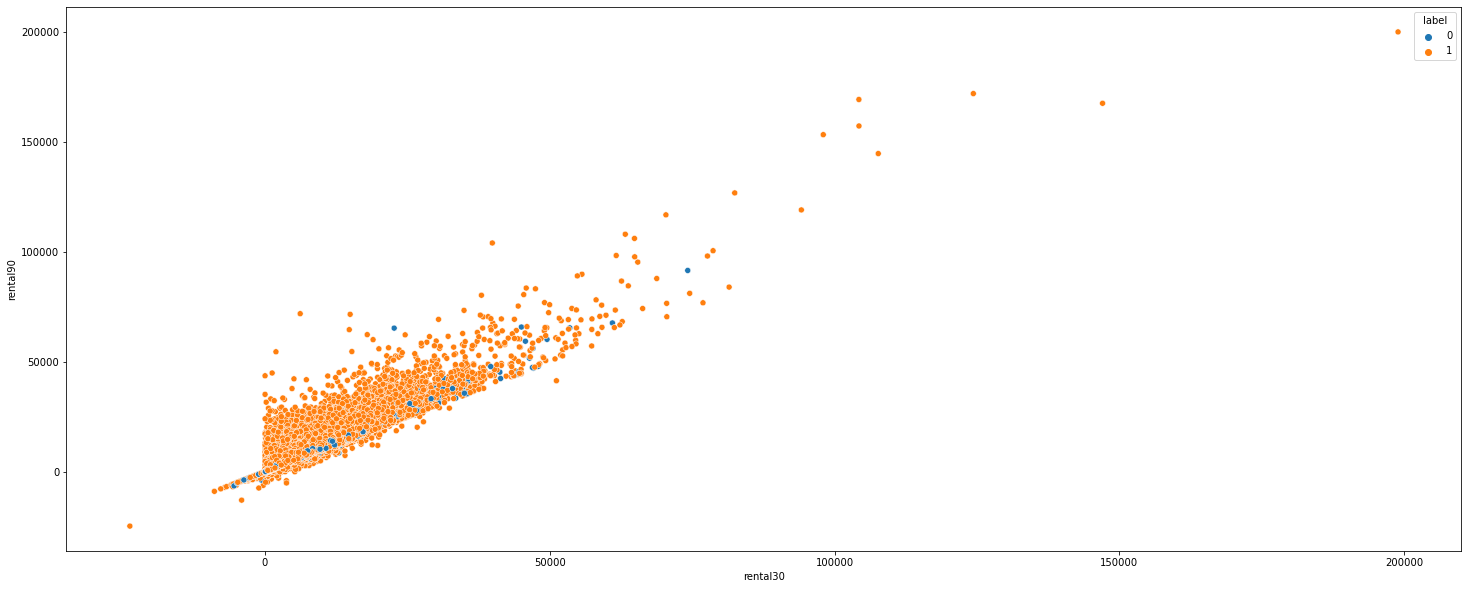

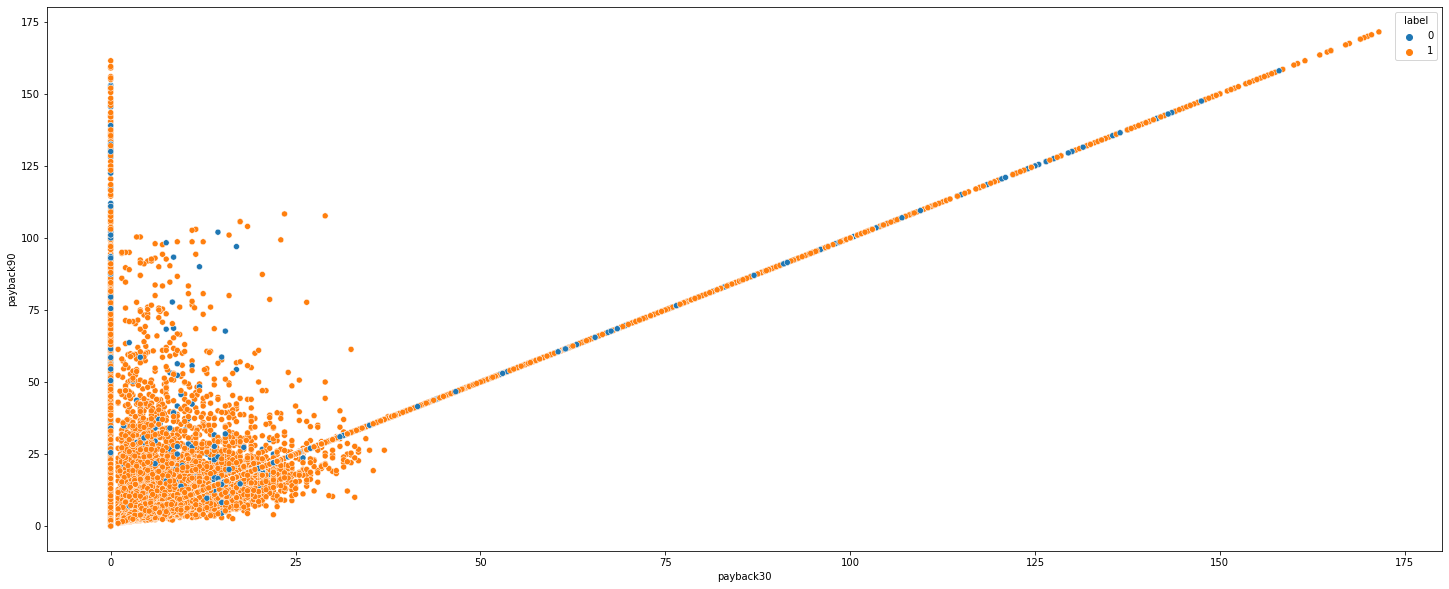

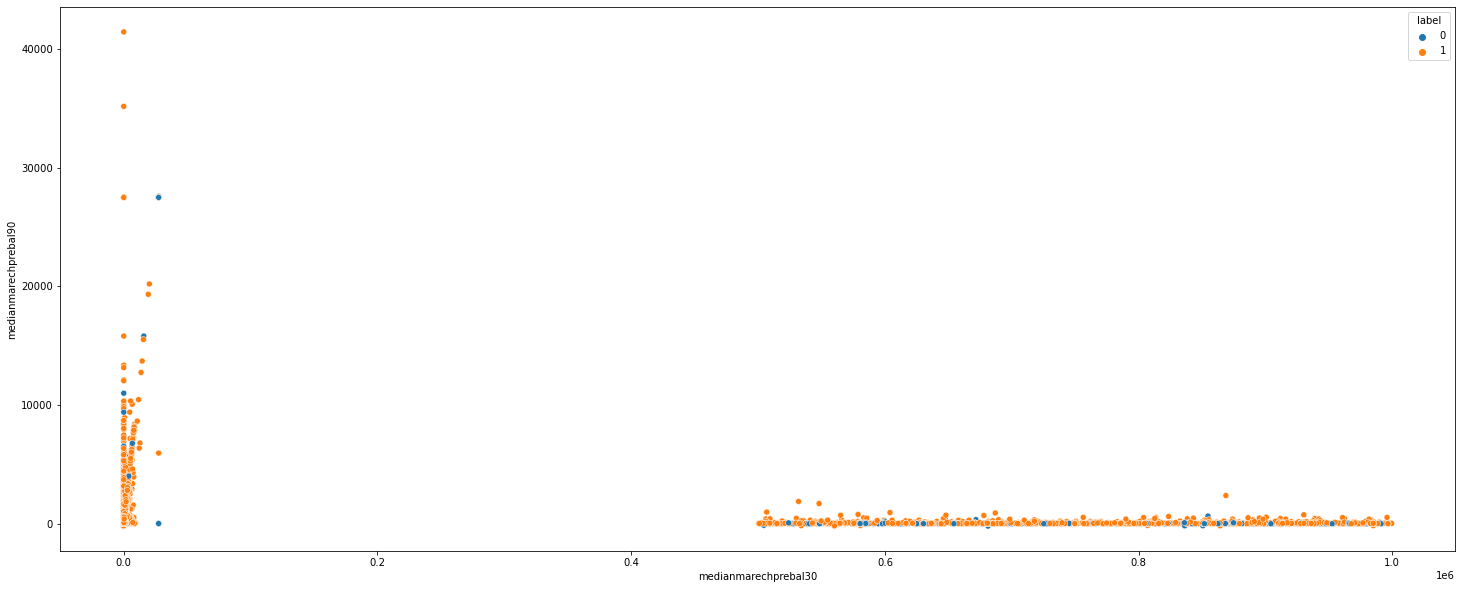

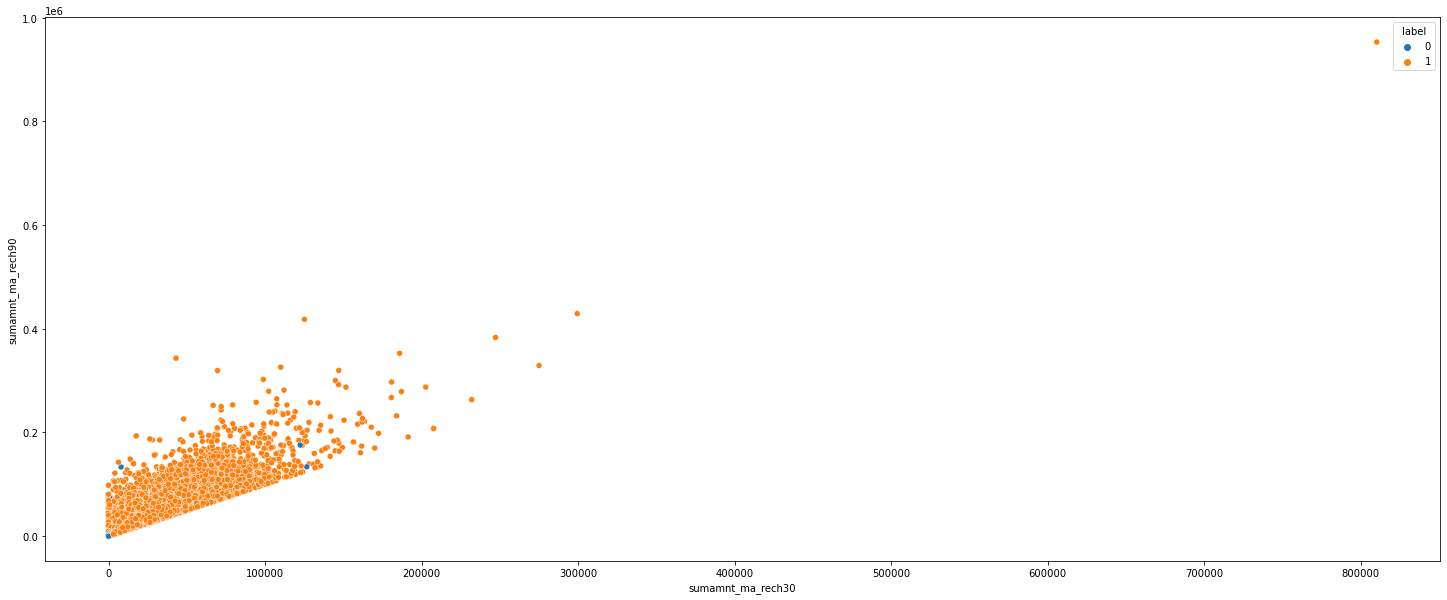

In [23]:
plt.figure(figsize=(25,10))
sns.scatterplot(x='medianamnt_loans30', y='medianamnt_loans90', data=df, hue='label')

plt.figure(figsize=(25,10))
sns.scatterplot(x='maxamnt_loans30', y='maxamnt_loans90', data=df, hue='label')

plt.figure(figsize=(25,10))
sns.scatterplot(x='cnt_da_rech30', y='cnt_da_rech90', data=df, hue='label')

plt.figure(figsize=(25,10))
sns.scatterplot(x='cnt_loans30', y='cnt_loans90', data=df, hue='label')

plt.figure(figsize=(25,10))
sns.scatterplot(x='amnt_loans30', y='amnt_loans90', data=df, hue='label')

plt.figure(figsize=(25,10))
sns.scatterplot(x='cnt_ma_rech30', y='cnt_ma_rech90', data=df, hue='label')

plt.figure(figsize=(25,10))
sns.scatterplot(x='fr_da_rech30', y='fr_da_rech90', data=df, hue='label')

plt.figure(figsize=(25,10))
sns.scatterplot(x='fr_ma_rech30', y='fr_ma_rech90', data=df, hue='label')

plt.figure(figsize=(25,10))
sns.scatterplot(x='medianamnt_ma_rech30', y='medianamnt_ma_rech90', data=df, hue='label')

plt.figure(figsize=(25,10))
sns.scatterplot(x='daily_decr30', y='daily_decr90', data=df, hue='label')

plt.figure(figsize=(25,10))
sns.scatterplot(x='rental30', y='rental90', data=df, hue='label')

plt.figure(figsize=(25,10))
sns.scatterplot(x='payback30', y='payback90', data=df, hue='label')

plt.figure(figsize=(25,10))
sns.scatterplot(x='medianmarechprebal30', y='medianmarechprebal90', data=df, hue='label')

plt.figure(figsize=(25,10))
sns.scatterplot(x='sumamnt_ma_rech30', y='sumamnt_ma_rech90', data=df, hue='label')

### Multivariate Analysis

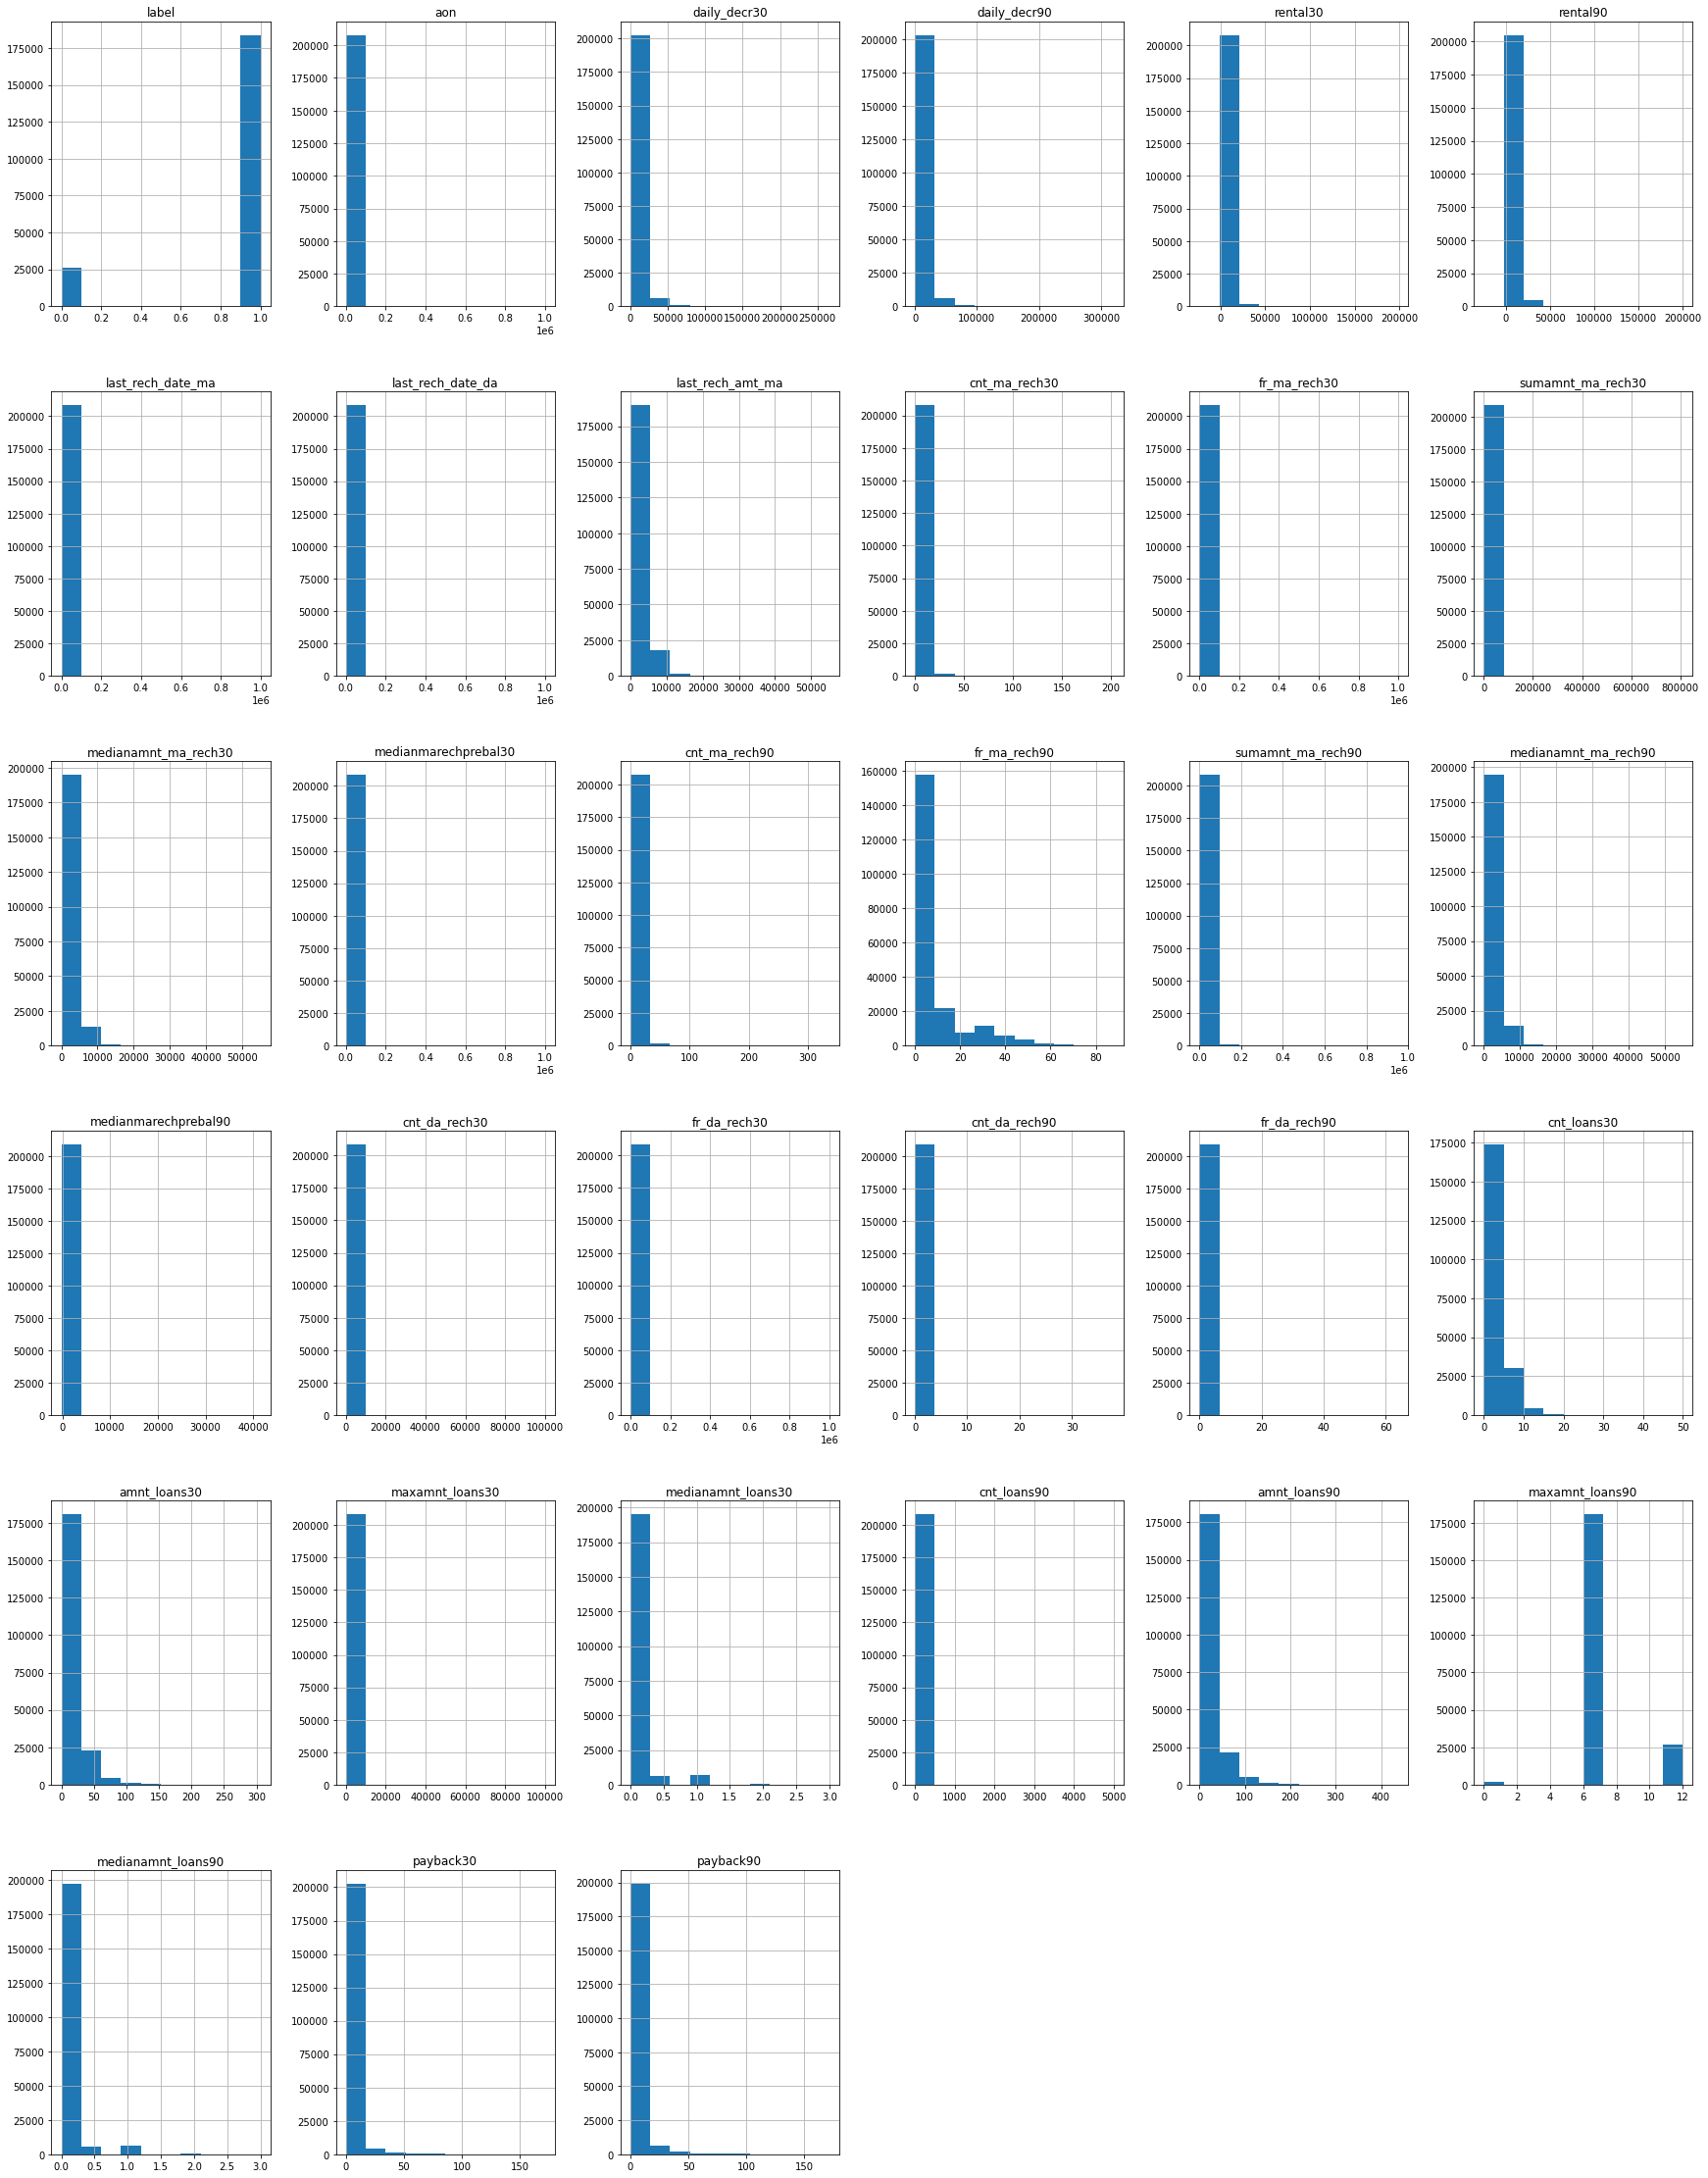

In [24]:
df.hist(figsize=(30,40))
plt.show()

Observation:

#### *for feature aon:*

-> Data ranges from -48 to 999860 with Mean value of 8112.34.

-> Data is highly spreaded and needs to be treated accordingly.

-> Data is positively skewed and needs to be treated accordingly.

#### *for feature daily_descr30:*

-> Data ranges from -93 to 265926 with Mean value of 5381.4.

-> Data is highly spreaded and needs to be treated accordingly.

-> Data is positively skewed and needs to be treated accordingly.

#### *for feature daily_descr90:*

-> Data ranges from -93 to 320630 with Mean value of 6082.52.

-> Data is highly spreaded and needs to be treated accordingly.

-> Data is positively skewed and needs to be treated accordingly.

#### *for feature rental30:*

-> Data ranges from -23737.14 to 198926 with Mean value of 2692.58.

-> Data is highly spreaded and needs to be treated accordingly.

-> Data is positively skewed and needs to be treated accordingly.

#### *for feature rental90:*

-> Data ranges from -24720 to 200148 with Mean value of 3483.41.

-> Data is highly spreaded and needs to be treated accordingly.

-> Data is positively skewed and needs to be treated accordingly.

#### *for feature last_rech_date_ma:*

-> Data ranges from -29 to 998650 with Mean value of 3755.85.

-> Data is highly spreaded and needs to be treated accordingly.

-> Data is positively skewed and needs to be treated accordingly.

#### *for feature last_rech_date_da:*

-> Data ranges from -29 to 999178 with Mean value of 3712.2.

-> Data is highly spreaded and needs to be treated accordingly.

-> Data is positively skewed and needs to be treated accordingly.

#### *for feature last_rech_amt_ma:*

-> Data ranges from 0 to 55000 with Mean value of 2064.45.

-> Data is highly spreaded and needs to be treated accordingly.

-> Data is positively skewed and needs to be treated accordingly.

#### *for feature cnt_ma_rech30:*

-> Data ranges from 0 to 203 with Mean value of 3.98.

-> Data is not distributed normally or in bell curve.

-> Data is spreaded and needs to be treated accordingly.

-> Data is positively skewed and needs to be treated accordingly.

#### *for feature fr_ma_rech30:*

-> Data ranges from 0 to 999606 with Mean value of 3737.36.

-> Data is not distributed normally or in bell curve.

-> Data is highly spreaded and needs to be treated accordingly.

-> Data is positively skewed and needs to be treated accordingly.

#### *for feature sumamnt_ma_rech30:*

-> Data ranges from 0 to 810096 with Mean value of 7704.5.

-> Data is not distributed normally or in bell curve.

-> Data is highly spreaded and needs to be treated accordingly.

-> Data is positively skewed and needs to be treated accordingly.

#### *for feature medianamnt_ma_rech30:*

-> Data ranges from 0 to 55000 with Mean value of 1812.82.

-> Data is not distributed normally or in bell curve.

-> Data is highly spreaded and needs to be treated accordingly.

-> Data is positively skewed and needs to be treated accordingly.

#### *for feature medianmarechprebal30:*

-> Data ranges from -200 to 999479 with Mean value of 3851.93.

-> Data is not distributed normally or in bell curve.

-> Data is highly spreaded and needs to be treated accordingly.

-> Data is positively skewed and needs to be treated accordingly.

#### *for feature cnt_ma_rech90:*

-> Data ranges from 0 to 336 with Mean value of 6.32.

-> Data is not distributed normally or in bell curve.

-> Data is highly spreaded and needs to be treated accordingly.

-> Data is positively skewed and needs to be treated accordingly.

#### *for feature fr_ma_rech90:*

-> Data ranges from 0 to 88 with Mean value of 7.72.

-> Data is not distributed normally or in bell curve.

-> Data is highly spreaded and needs to be treated accordingly.

-> Data is positively skewed and needs to be treated accordingly.

#### *for feature sumamnt_ma_rech90:*

-> Data ranges from 0 to 953036 with Mean value of 12396.22.

-> Data is not distributed normally or in bell curve.

-> Data is highly spreaded and needs to be treated accordingly.

-> Data is positively skewed and needs to be treated accordingly.

#### *for feature medianamnt_ma_rech90:*

-> Data ranges from 0 to 55000 with Mean value of 1864.6.

-> Data is not distributed normally or in bell curve.

-> Data is highly spreaded and needs to be treated accordingly.

-> Data is positively skewed and needs to be treated accordingly.

#### *for feature medianmarechprebal90:*

-> Data ranges from -200 to 41456 with Mean value of 92.03.

-> Data is not distributed normally or in bell curve.

-> Data is highly spreaded and needs to be treated accordingly.

-> Data is positively skewed and needs to be treated accordingly.

#### *for feature cnt_da_rech30:*

-> Data ranges from 0 to 99914 with Mean value of 262.58.

-> Data is not distributed normally or in bell curve.

-> Data is highly spreaded and needs to be treated accordingly.

-> Data is positively skewed and needs to be treated accordingly.

#### *for feature fr_da_rech30:*

-> Data ranges from 0 to 999809 with Mean value of 3749.49.

-> Data is not distributed normally or in bell curve.

-> Data is highly spreaded and needs to be treated accordingly.

-> Data is positively skewed and needs to be treated accordingly.

#### *for feature cnt_da_rech90:*

-> Data ranges from 0 to 38 with Mean value of 0.04.

-> Data is distributed normally but not in bell curve.

-> Data is positively skewed and needs to be treated accordingly.

#### *for feature fr_da_rech90:*

-> Data ranges from 0 to 64 with Mean value of 0.05.

-> Data is not distributed normally or in bell curve.

-> Data is positively skewed and needs to be treated accordingly.

#### *for feature cnt_loans30:*

-> Data ranges from 0 to 50 with Mean value of 2.76.

-> Data is not distributed normally or in bell curve.

-> Data is positively skewed and needs to be treated accordingly.

#### *for feature amnt_loans30:*

-> Data ranges from 0 to 306 with Mean value of 17.95.

-> Data is not distributed normally or in bell curve.

-> Data is positively skewed and needs to be treated accordingly.

#### *for feature maxamnt_loans30:*

-> Data ranges from 0 to 99864 with Mean value of 274.66.

-> Data is not distributed normally or in bell curve.

-> Data is positively skewed and needs to be treated accordingly.

#### *for feature medianamnt_loans30:*

-> Data ranges from 0 to 3 with Mean value of 0.05.

-> Data is not distributed normally or in bell curve and it is understandable as feature has only limited set of values.

-> Data is positively skewed and needs to be treated accordingly.

#### *for feature cnt_loans90:*

-> Data ranges from 0 to 4997.52 with Mean value of 18.52.

-> Data is not distributed normally or in bell curve.

-> Data is positively skewed and needs to be treated accordingly.

#### *for feature amnt_loans90:*

-> Data ranges from 0 to 438 with Mean value of 23.65.

-> Data is not distributed normally or in bell curve.

-> Data is positively skewed and needs to be treated accordingly.

#### *for feature maxamnt_loans90:*

-> Data ranges from 0 to 12 with Mean value of 6.7.

-> Data is not distributed normally or in bell curve and it understandable as user has two option for loans i.e., 5 and 10 for with 6 and 12 has to be paid.

-> Data is positively skewed and needs to be treated accordingly.

#### *for feature medianamnt_loans90:*

-> Data ranges from 0 to 3 with Mean value of 0.05.

-> Data is not distributed normally or in bell curve.

-> Data is positively skewed and needs to be treated accordingly.

#### *for feature payback30:*

-> Data ranges from 0 to 171.5 with Mean value of 3.4.

-> Data is not distributed normally or in bell curve.

-> Data is positively skewed and needs to be treated accordingly.

#### *for feature payback90:*

-> Data ranges from 0 to 171.5 with Mean value of 4.32.

-> Data is not distributed normally or in bell curve.

-> Data is positively skewed and needs to be treated accordingly.

#### Correlation using a Heatmap

##### Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.

##### Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

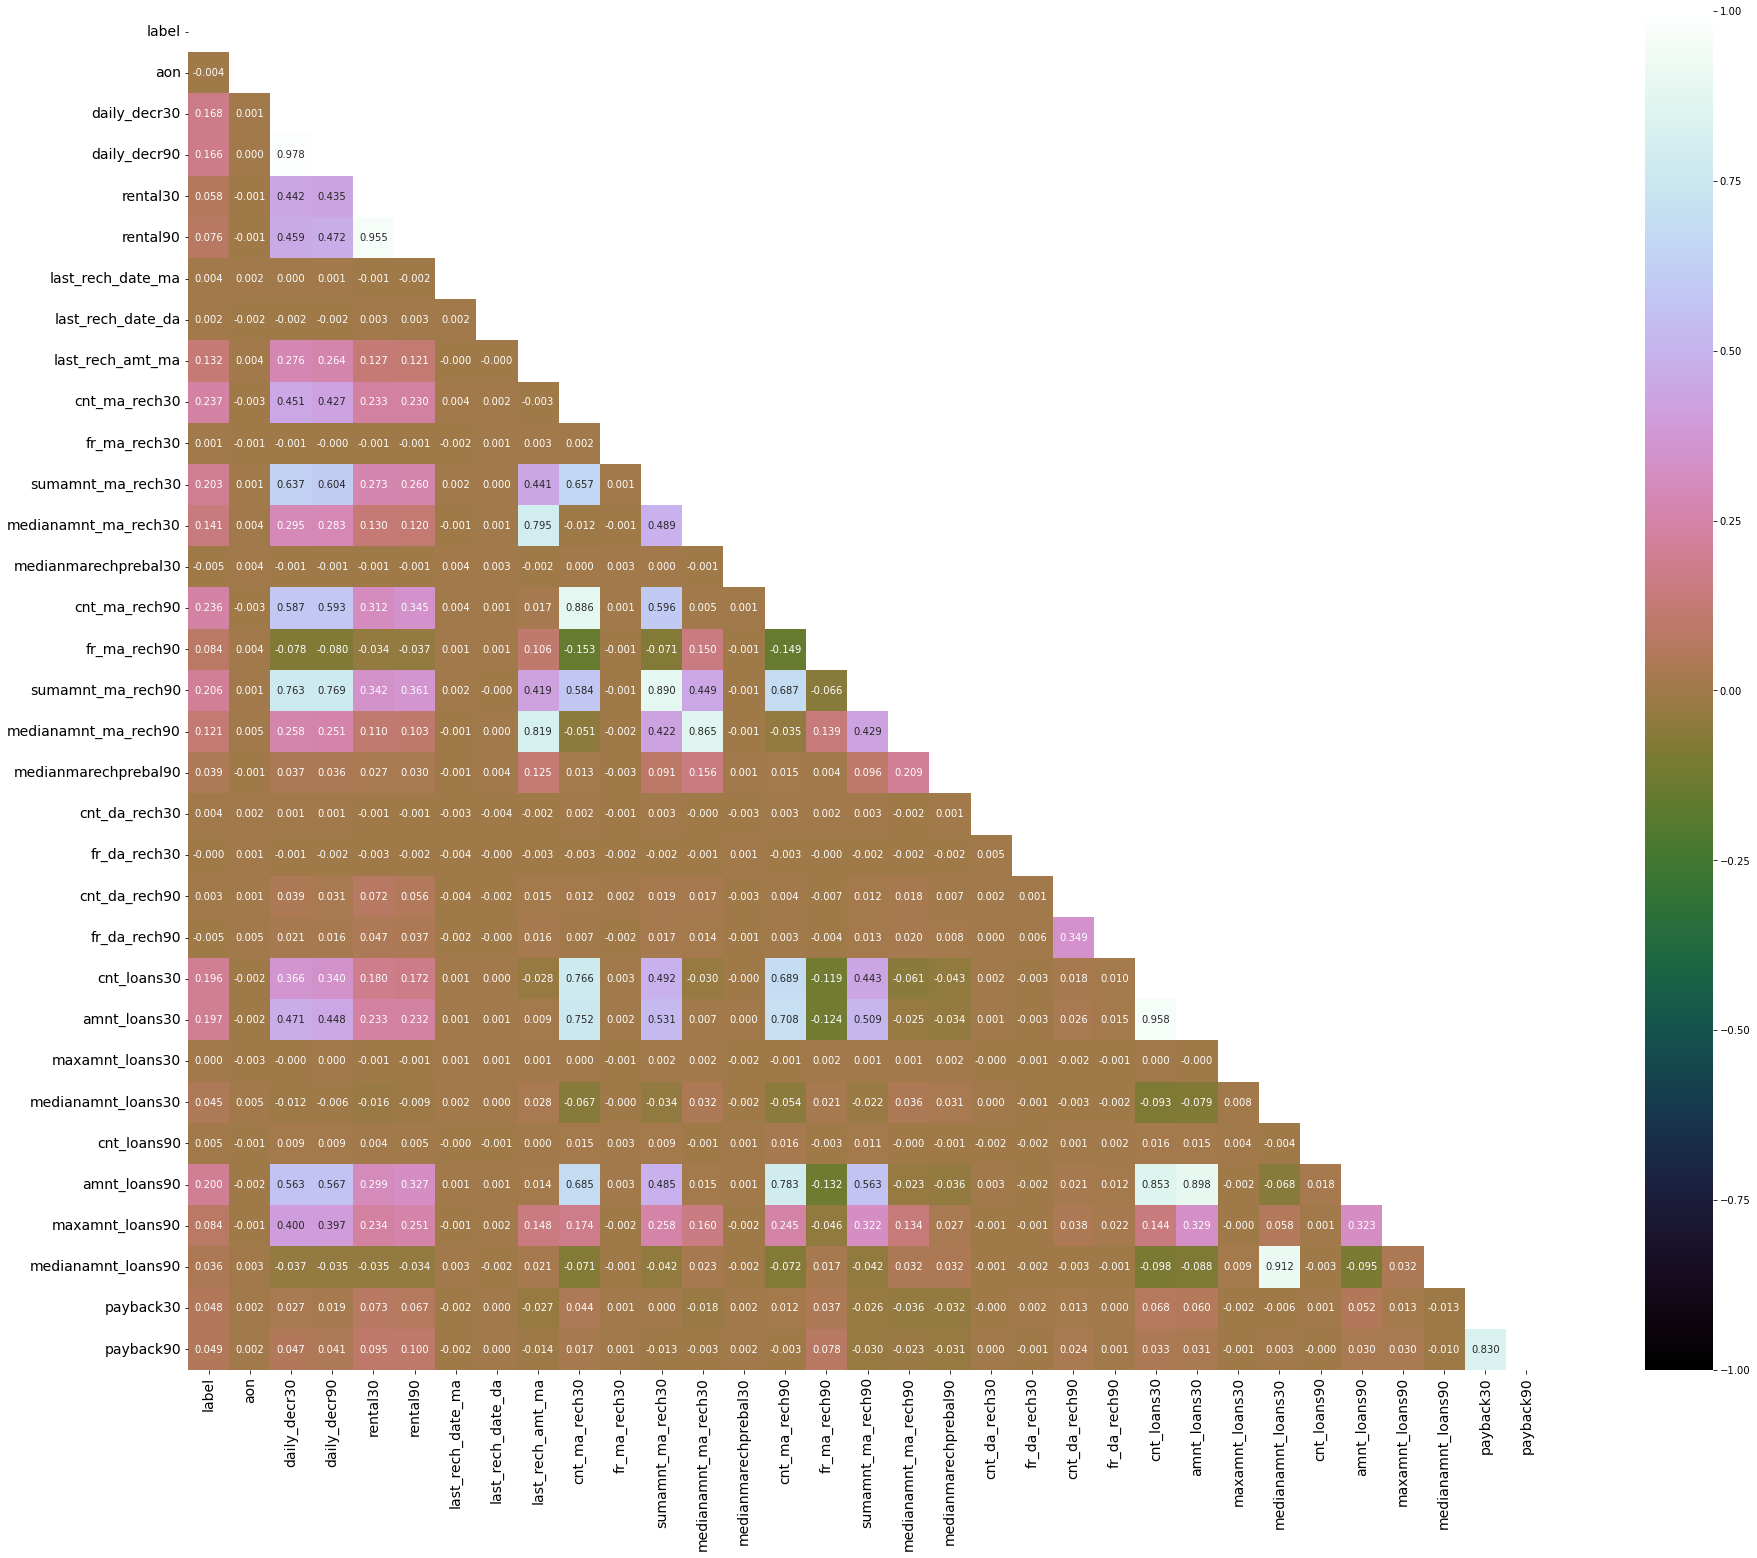

In [25]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(35,25))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cubehelix", mask=upper_triangle)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


In the above heatmap due to lot of columns we are not able to see the correlation details however we can observe the color coding details and get a hint that there is no multi collinearity concern between the column values.

### Correlation Bar Plot comparing Gender column with the remaining columns

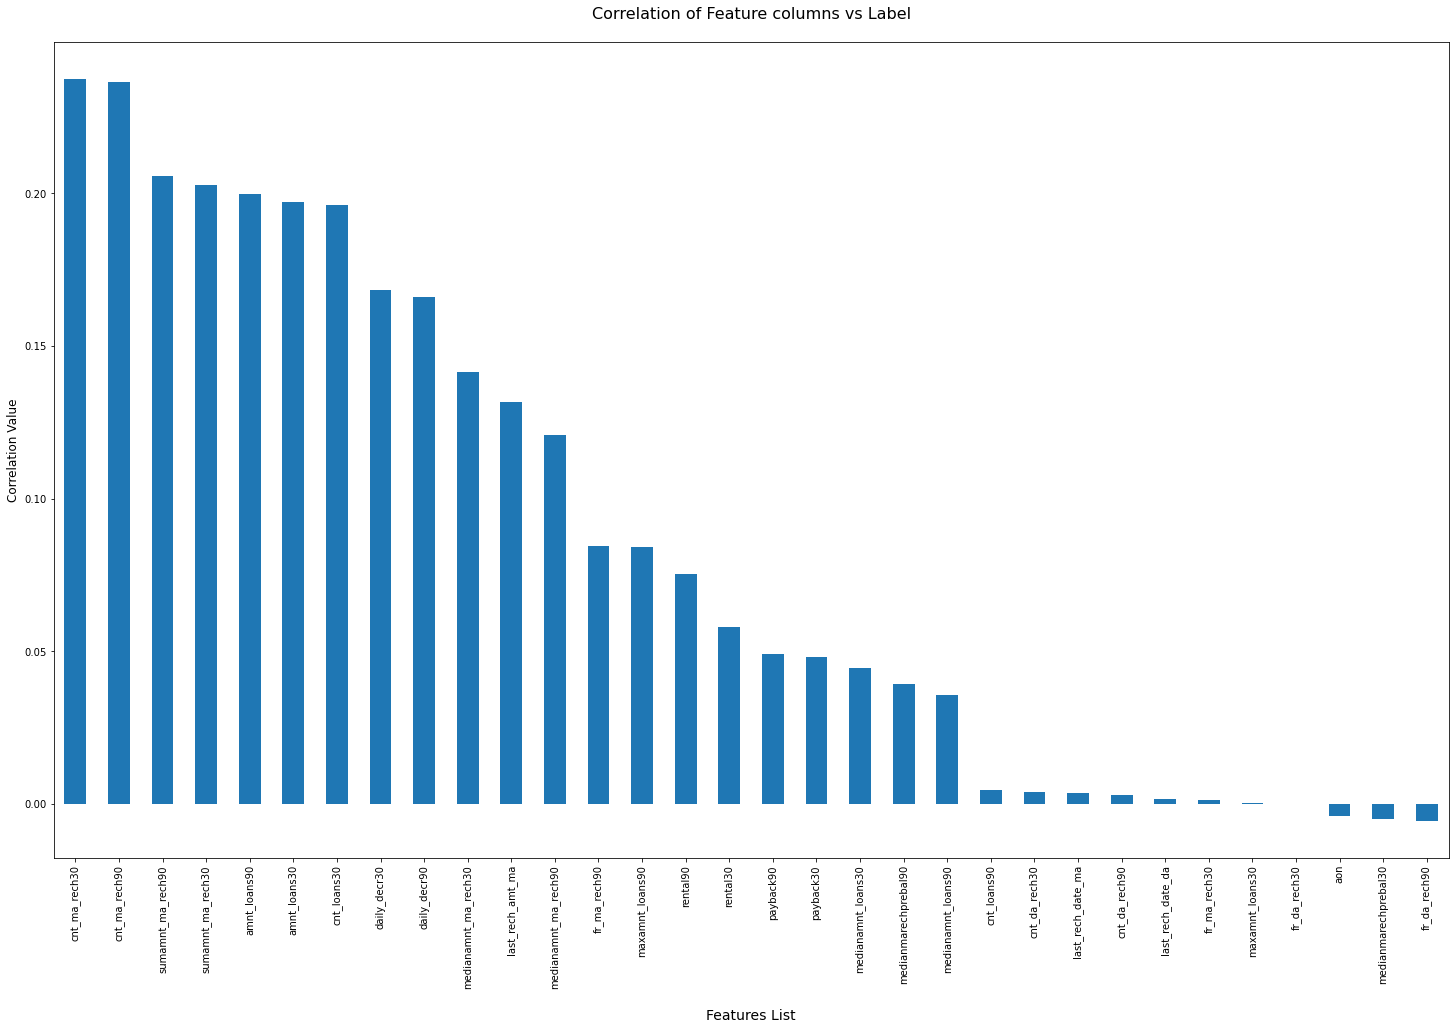

In [26]:
df_corr = df.corr()
plt.figure(figsize=(25,15))
df_corr['label'].sort_values(ascending=False).drop('label').plot.bar()
plt.title("Correlation of Feature columns vs Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

In the above Bar Plot we are able to clearly define the feature columns that are positively correlated with our label and the feature columns that are negatively correlated with our label.

## Data Preprocessing

In [27]:
df['pdate'] = pd.to_datetime(df['pdate']) # converting from object to datetime

df['Year']=df['pdate'].dt.year
df['Month']=df['pdate'].dt.month
df['Date']=df['pdate'].dt.day

print(df['Year'].value_counts())
print(df['Month'].value_counts())
print(df['Date'].value_counts())

2016    209592
Name: Year, dtype: int64
7    85764
6    83154
8    40674
Name: Month, dtype: int64
11    8092
10    8050
6     8030
12    8028
7     8026
5     7989
13    7969
8     7899
2     7839
1     7824
15    7820
14    7816
9     7717
17    7643
3     7607
16    7556
18    7305
4     7154
19    6857
20    6729
21    5964
23    5815
22    5753
27    5283
25    5269
26    5174
30    5129
24    5103
29    5077
28    4897
31    2178
Name: Date, dtype: int64


In [28]:
df.drop(columns=['msisdn', 'pdate', 'Year'], axis=1, inplace=True)
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month,Date
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,7,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,8,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,8,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,6,22


### Treating Outliers 

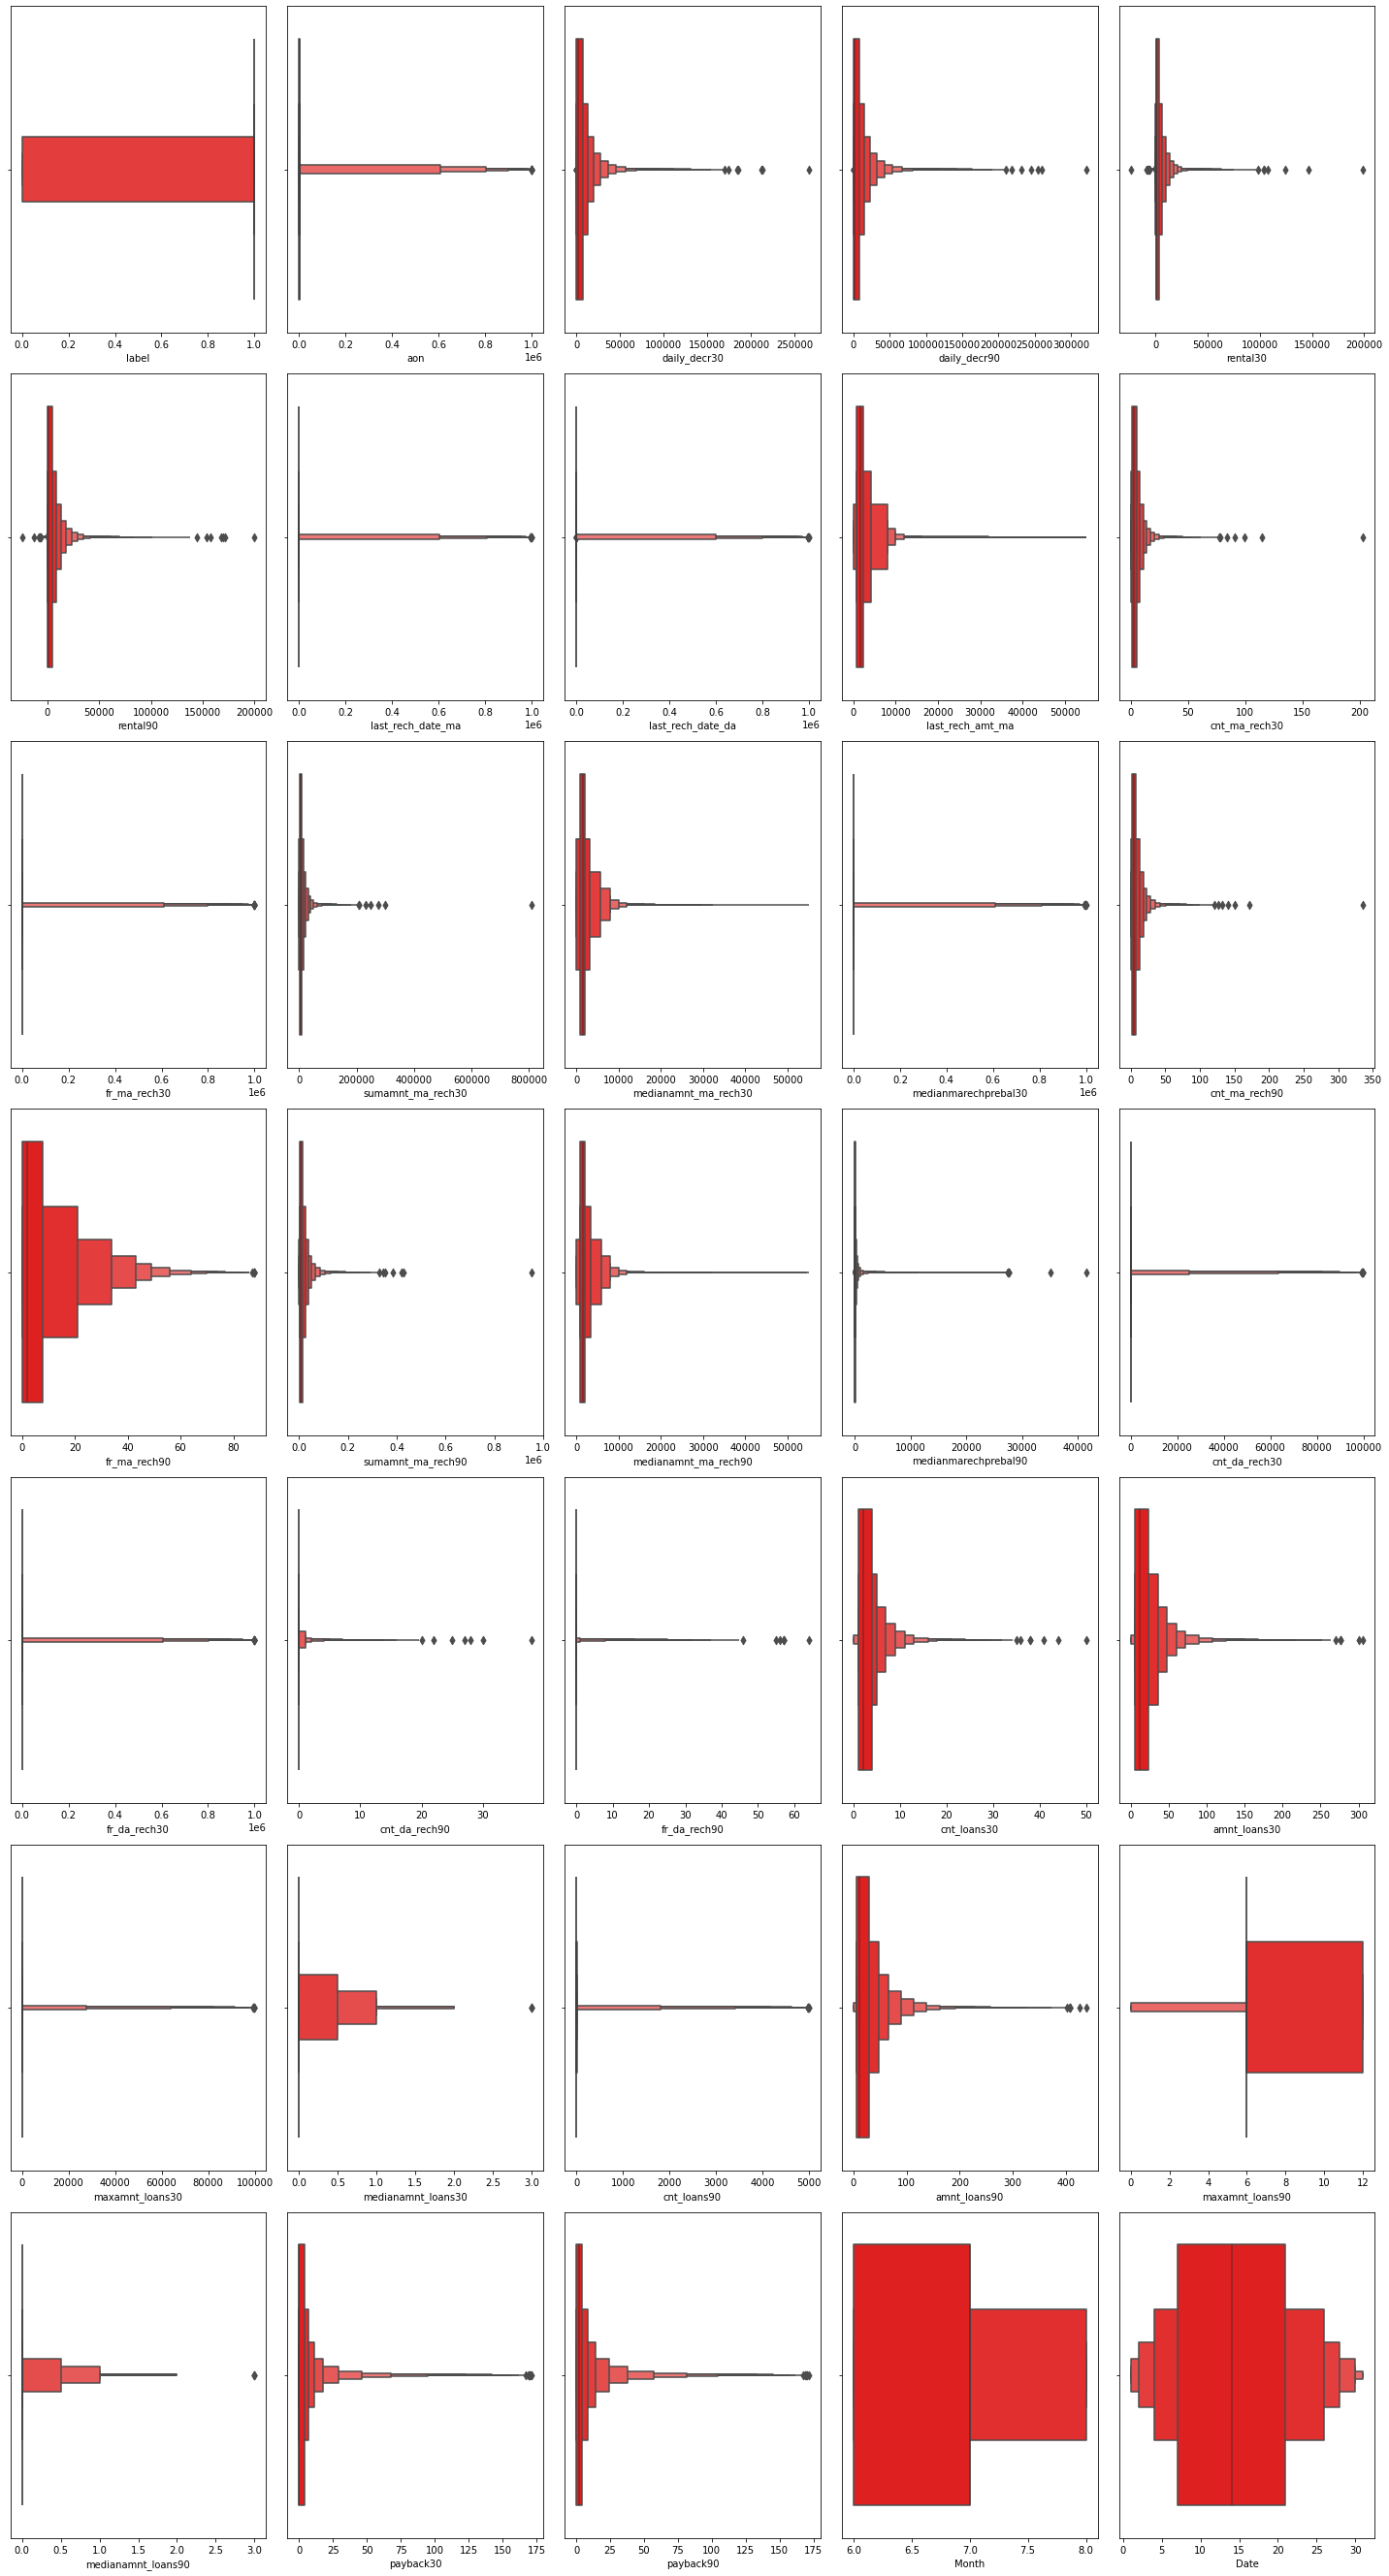

In [29]:
plt.figure(figsize=(20,37))
outl_df = df.columns.values
for i in range(0, len(outl_df)):
    plt.subplot(7, 5, i+1)
    ax = sns.boxenplot(df[outl_df[i]], color='red')
    plt.tight_layout()


With the help of boxen plot we can see the outlier details present in our numerical data columns. However when I tried removing the outliers using Z score or IQR methods I was losing close to 25 percent data therefore retaining all the data points.

## Skewness

In [30]:
df.skew()

label                   -2.270245
aon                     10.392923
daily_decr30             3.946219
daily_decr90             4.252553
rental30                 4.521921
rental90                 4.437670
last_rech_date_ma       14.790938
last_rech_date_da       14.814821
last_rech_amt_ma         3.781141
cnt_ma_rech30            3.283838
fr_ma_rech30            14.772797
sumamnt_ma_rech30        6.386774
medianamnt_ma_rech30     3.512314
medianmarechprebal30    14.779840
cnt_ma_rech90            3.425244
fr_ma_rech90             2.285415
sumamnt_ma_rech90        4.897937
medianamnt_ma_rech90     3.752696
medianmarechprebal90    44.880396
cnt_da_rech30           17.818321
fr_da_rech30            14.776395
cnt_da_rech90           27.267213
fr_da_rech90            28.988013
cnt_loans30              2.713426
amnt_loans30             2.975720
maxamnt_loans30         17.658009
medianamnt_loans30       4.551031
cnt_loans90             16.594368
amnt_loans90             3.149999
maxamnt_loans9

With the skew method we see that there are columns present in our dataset that are above the acceptable range of +/-0.5 value.



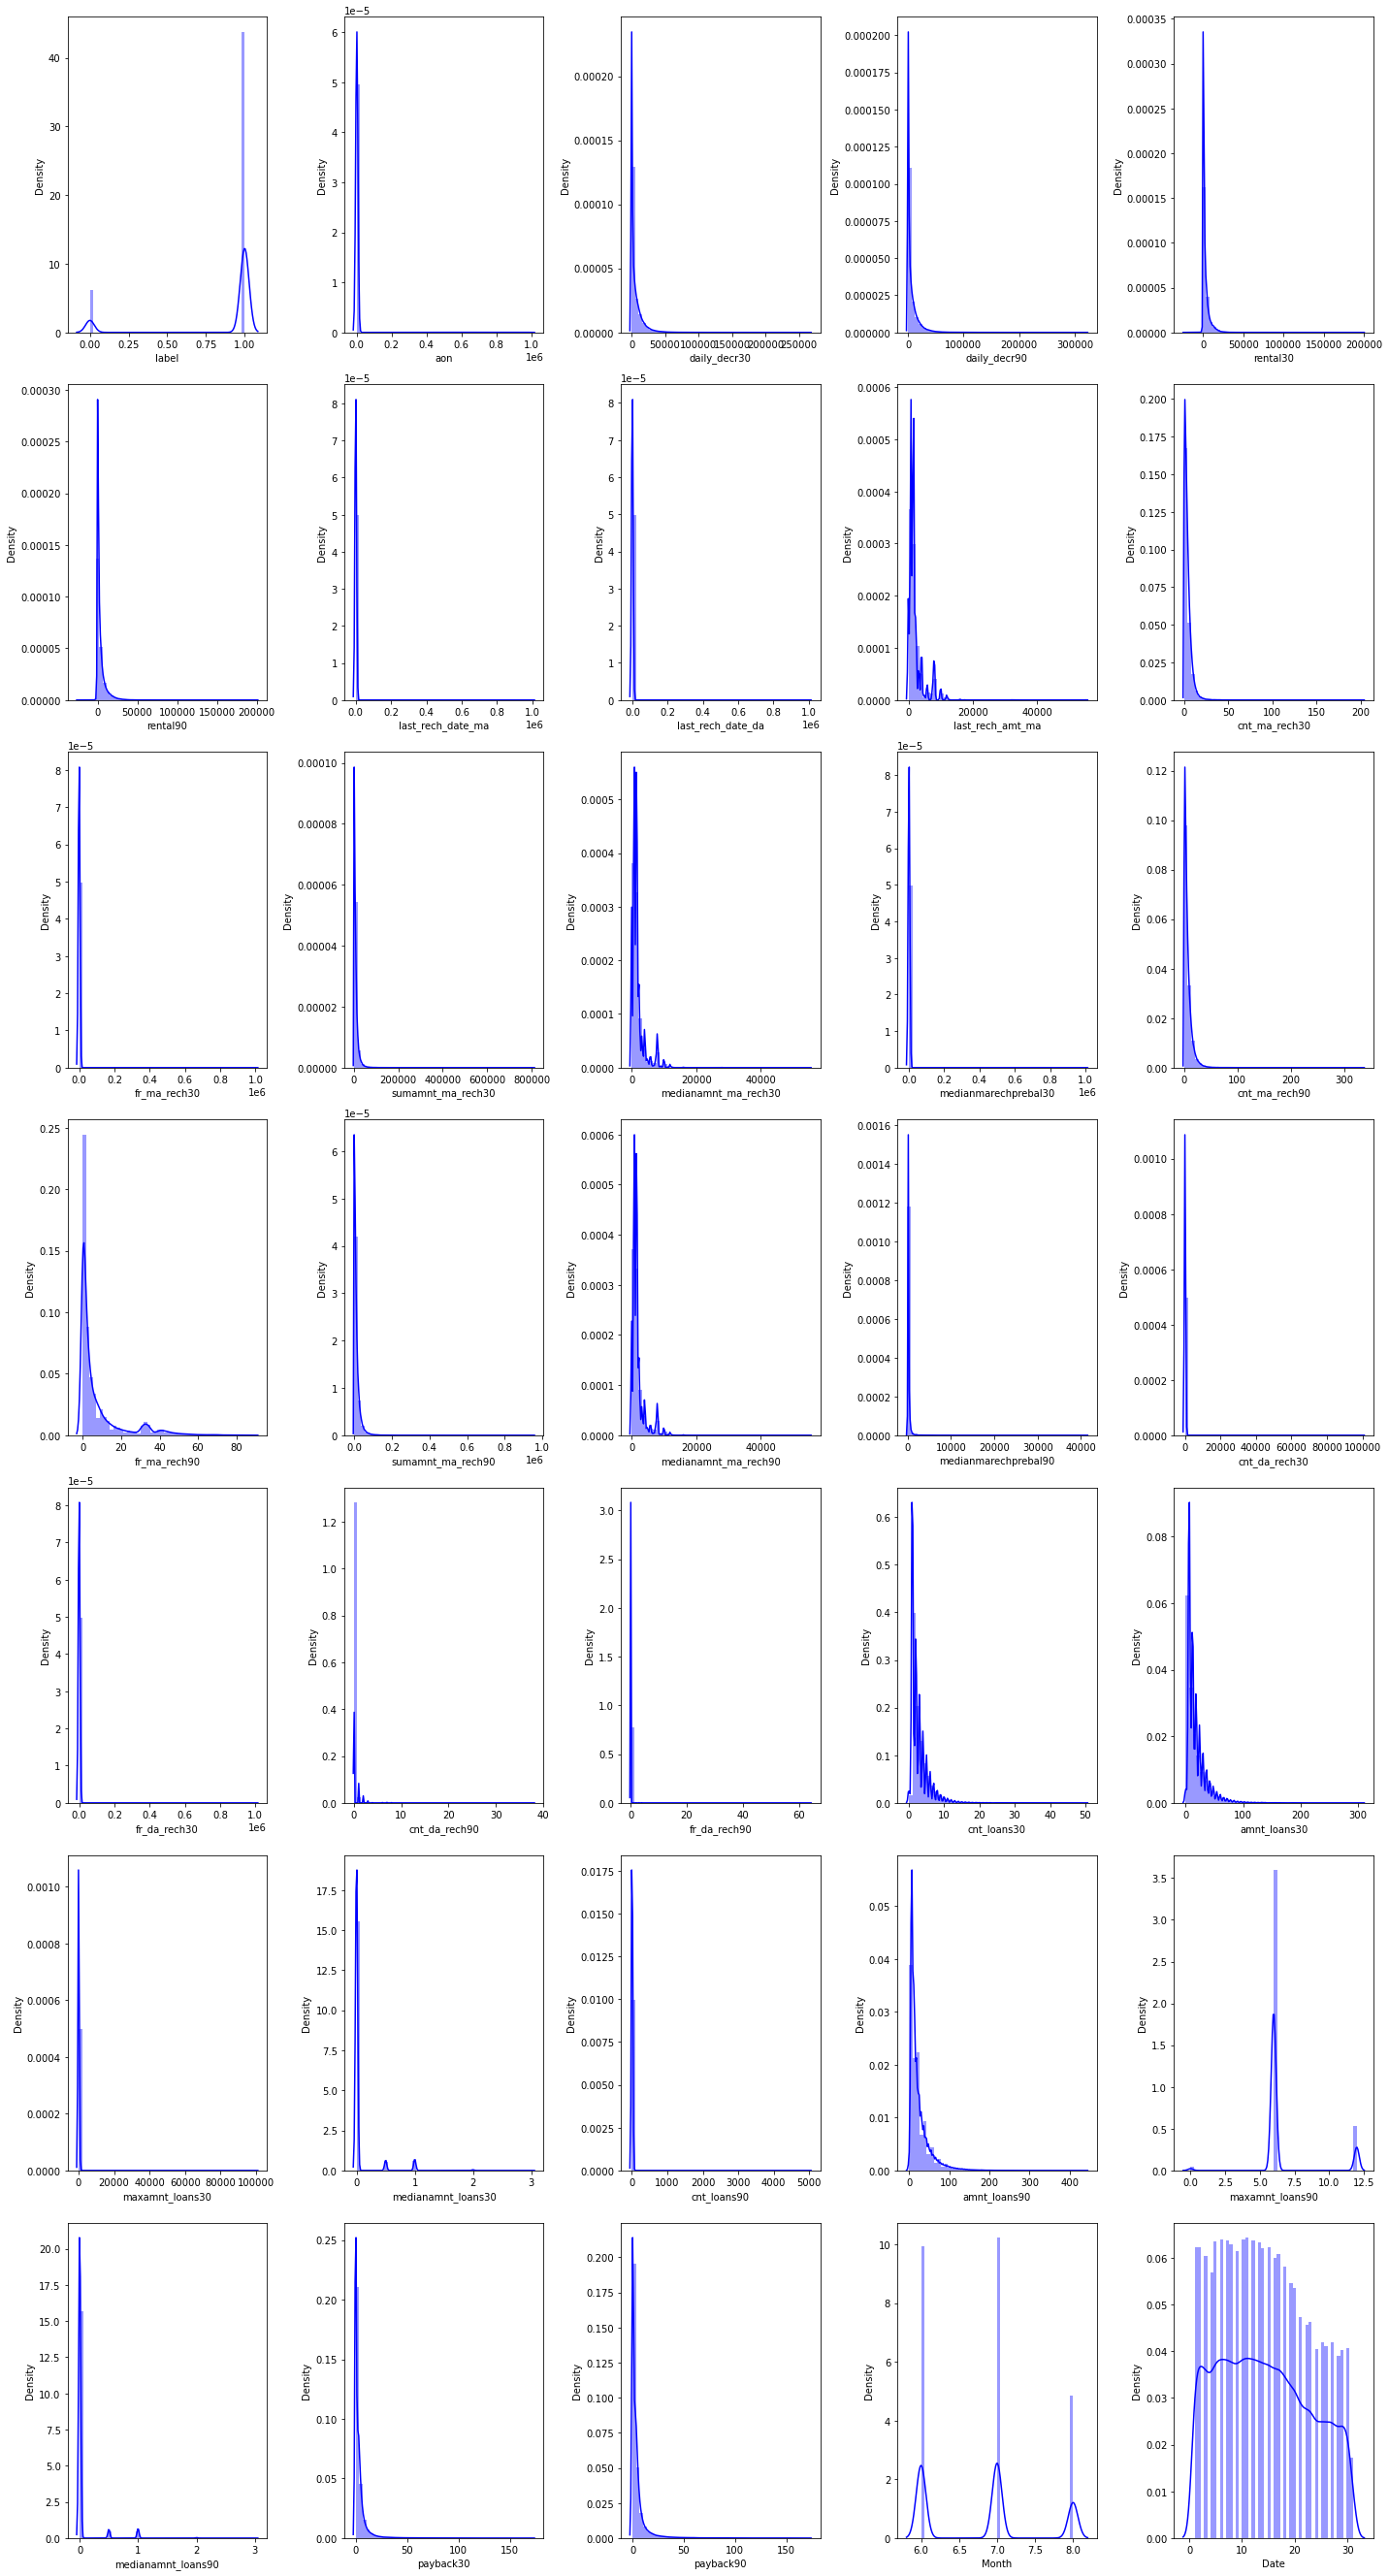

In [31]:
plt.figure(figsize=(20,37))
for i in range(0, len(outl_df)):
    plt.subplot(7, 5, i+1)
    ax = sns.distplot(df[outl_df[i]], color='blue')
    plt.tight_layout()

With the help of distribution plot we can see the skewness details present in our numerical data columns. I tried using log transformation to reduce the skewness however that created NaN values for our dataset and hence I am trying to avoid that situation by using this slightly skewed data.

### Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [32]:
## seperating the features and the target
X = df.drop('label', axis=1)
Y = df['label']

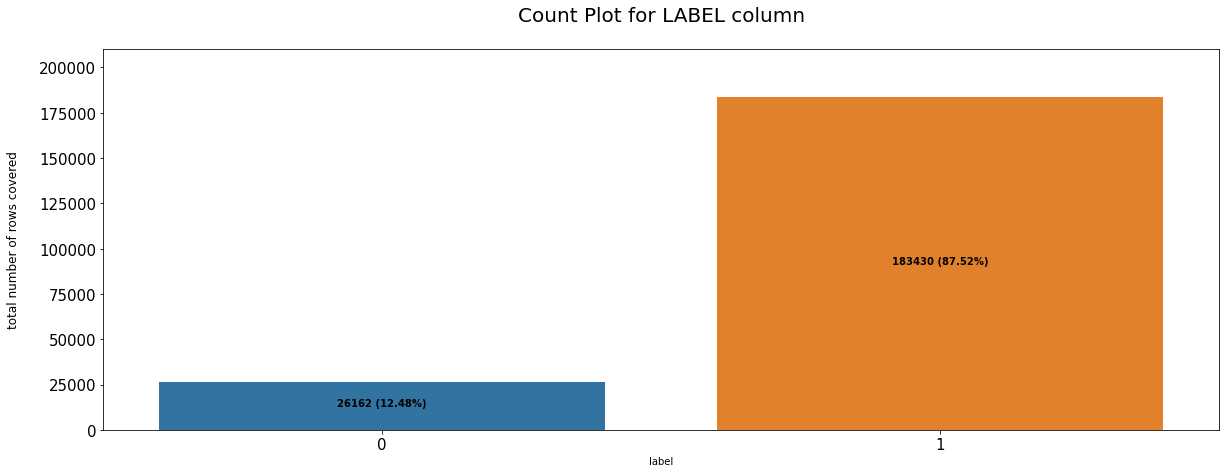

In [33]:
## let's check the target 'label' for any imbalance data
try:
    x = 'label'
    k=0
    plt.figure(figsize=[20,7])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,210000)
    plt.title(f'Count Plot for {x.upper()} column\n',fontsize=20)
    plt.ylabel(f'total number of rows covered\n',fontsize=12)
    plt.yticks(fontsize = 15)
    plt.xticks(fontsize = 15)
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass


In [34]:
old_label = Y.value_counts()
old_label

1    183430
0     26162
Name: label, dtype: int64

Listing the values of our label column to count the number of rows occupied by each category. This indicates class imbalance that we will need to fix by using the oversampling method.

In [35]:
# importing smote from imb learn , using oversampling method
from imblearn.over_sampling import SMOTE
# adding samples to make all the categorical label values same

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

SMOTE is the over sampling mechanism that we are using to ensure that all the categories present in our target label have the same number of rows covered.

In [36]:
new_label = Y.value_counts()
print(new_label)

0    183430
1    183430
Name: label, dtype: int64


After applying over sampling we are once again listing the values of our label column to cross verify the updated information. Here we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the machine learning model does not get biased towards one category.

### Feature Scaling

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month,Date
0,-0.105630,-0.073295,-0.107135,-0.536660,-0.521643,-0.068482,-0.069519,-0.071795,-0.215175,-0.068119,-0.264078,0.033240,-0.072719,-0.380788,1.241457,-0.379436,-0.016358,-0.166459,-0.061227,-0.069508,-0.087834,-0.054704,-0.060450,-0.137352,-0.062246,-0.232008,-0.068377,-0.254749,-0.283333,-0.220121,3.028395,2.512598,0.528684,0.754832
1,-0.099961,1.130608,0.919830,0.317597,0.137636,-0.068141,-0.069519,1.802148,-0.485465,-0.068522,0.049883,2.165074,-0.071751,-0.543787,-0.540821,-0.187394,2.069921,-0.029286,-0.061227,-0.069508,-0.087834,-0.054704,-0.526649,-0.137352,-0.060822,-0.232008,-0.073005,-0.254749,3.200716,-0.220121,-0.337173,-0.371605,2.018247,-0.531727
2,-0.102241,-0.293317,-0.296118,-0.369310,-0.398669,-0.068463,-0.069519,-0.071795,-0.485465,-0.068522,-0.442441,0.033240,-0.071655,-0.543787,-0.540821,-0.488536,-0.016358,-0.015758,-0.061227,-0.069508,-0.087834,-0.054704,-0.526649,-0.549635,-0.062246,-0.232008,-0.073005,-0.529063,-0.283333,-0.220121,-0.337173,-0.371605,2.018247,0.626176
3,-0.106029,-0.476124,-0.452184,-0.551601,-0.540994,-0.067742,-0.069519,-0.332947,-0.755756,-0.068522,-0.620804,-0.739098,-0.072855,-0.543787,-0.540821,-0.530503,-0.307101,-0.179269,-0.061227,-0.069508,-0.087834,-0.054704,-0.060450,-0.137352,-0.062246,-0.232008,-0.068377,-0.254749,-0.283333,-0.220121,-0.337173,-0.371605,-0.960879,-1.046351
4,-0.096934,-0.458944,-0.437517,-0.320392,-0.360477,-0.068444,-0.069519,0.267879,1.136277,-0.068483,1.700467,0.419660,-0.072330,0.597208,-0.371080,1.068001,0.646164,-0.096002,-0.061227,-0.069508,-0.087834,-0.054704,2.270546,1.924062,-0.062246,-0.232008,-0.045235,1.116819,-0.283333,-0.220121,-0.066380,-0.139542,-0.960879,1.012144


I am scaling my feature data to ensure that there is no issue with the data biasness over a particular column instead a standardization will occur helping us in having a uniform dataset value.

## Model Building 

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

####  Finding best random state for building Classification Models

In [39]:
maxAccu=0
maxRS=0

for i in range(1, 200):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 79.43302622253721 on Random State 72


In [40]:
maxAccu=0
maxRS=0

for i in range(1, 200):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 79.47173308619092 on Random State 133


Great so with the help of random state selection process we have found Random state 33 to be the best at test size 0.2 amongst 1-200 range.

### Feature Importance Bar Graph

,Importance
Features,
cnt_loans90,0.081
amnt_loans90,0.076
amnt_loans30,0.063
daily_decr90,0.061
sumamnt_ma_rech90,0.060
Month,0.057
cnt_ma_rech90,0.055
daily_decr30,0.055
Date,0.050


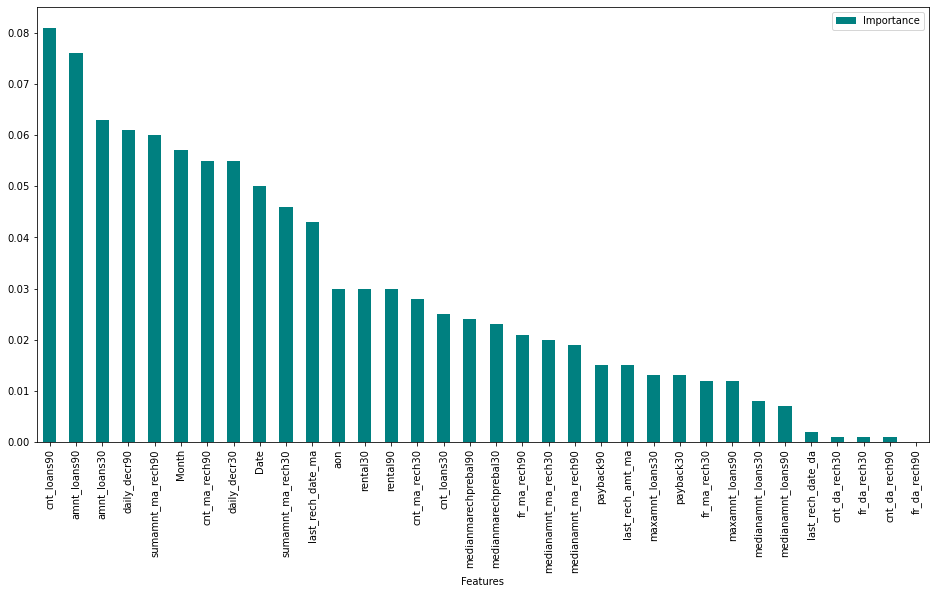

In [41]:
rf=RandomForestClassifier()
rf.fit(X_train, Y_train)
importances = pd.DataFrame({'Features':X.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
plt.rcParams["figure.figsize"] = (16,8)
importances.plot.bar(color='teal')
importances

Here with the help of RandomForestClassifier we are able to list down the importance or priority given to a column as per it's involvement or weightage in predicting our label.

In [42]:
## Removing the least important columns from our features list to reduce the processing time on features that do not contribute much towards the label prediction.

X.drop(["last_rech_date_da", "cnt_da_rech90", "cnt_da_rech30", "fr_da_rech30", "fr_da_rech90"], axis=1, inplace=True)

### Creating the training and testing data sets with optimum Random State

In [43]:
x = X
y = Y
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=33)

## Separated the entire dataset into training and testing chunks in the ratio 75:25 so that our classification model can learn on the training dataset and then we can check the accuracy using the unseen testing dataset.

In [46]:
# creating a function to run all the classifiers
## importing cross_validation score 
from sklearn.model_selection import cross_val_score

def classifier(model, x, y):
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting y_test
    pred = model.predict(x_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)
    
## Created a class that will perform the train-test split, training of machine learning model, predicting the label value, getting the accuracy score, generating the classification report, getting the cross validation score and the result of difference between the accuracy score and cross validation score for any machine learning model that calls for this function.

## Logistic Regression

In [47]:
model = LogisticRegression()
classifier(model, x, y)

Accuracy Score: 79.3408929836995

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.85      0.81     36840
           1       0.83      0.73      0.78     36532

    accuracy                           0.79     73372
   macro avg       0.80      0.79      0.79     73372
weighted avg       0.80      0.79      0.79     73372

Cross Validation Score: 79.07294335713895

Accuracy Score - Cross Validation Score is 0.26794962656055077


## Gaussian Naive Bayes

In [48]:
model = GaussianNB()
classifier(model, x, y)

Accuracy Score: 71.70719075396609

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.89      0.76     36840
           1       0.84      0.54      0.65     36532

    accuracy                           0.72     73372
   macro avg       0.75      0.72      0.71     73372
weighted avg       0.75      0.72      0.71     73372

Cross Validation Score: 71.40189718148612

Accuracy Score - Cross Validation Score is 0.30529357247996813


## DecisionTree Classifier

In [49]:
model = DecisionTreeClassifier()
classifier(model, x, y)

Accuracy Score: 91.25824565229243

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91     36840
           1       0.92      0.91      0.91     36532

    accuracy                           0.91     73372
   macro avg       0.91      0.91      0.91     73372
weighted avg       0.91      0.91      0.91     73372

Cross Validation Score: 90.5007359755765

Accuracy Score - Cross Validation Score is 0.7575096767159266


## KNeighbors Classifier

In [50]:
model = KNeighborsClassifier()
classifier(model, x, y)

Accuracy Score: 87.5892711115957

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88     36840
           1       0.91      0.83      0.87     36532

    accuracy                           0.88     73372
   macro avg       0.88      0.88      0.88     73372
weighted avg       0.88      0.88      0.88     73372

Cross Validation Score: 87.62606989042142

Accuracy Score - Cross Validation Score is -0.036798778825712475


## SGDClassifier

In [51]:
model = SGDClassifier()
classifier(model, x, y)

Accuracy Score: 78.79845172545386

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.84      0.80     36840
           1       0.82      0.73      0.78     36532

    accuracy                           0.79     73372
   macro avg       0.79      0.79      0.79     73372
weighted avg       0.79      0.79      0.79     73372

Cross Validation Score: 78.74066401352013

Accuracy Score - Cross Validation Score is 0.05778771193372734


## RandomForest Classifier

In [52]:
model = RandomForestClassifier()
classifier(model, x, y)

Accuracy Score: 94.93948645259772

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95     36840
           1       0.94      0.95      0.95     36532

    accuracy                           0.95     73372
   macro avg       0.95      0.95      0.95     73372
weighted avg       0.95      0.95      0.95     73372

Cross Validation Score: 94.35506732813607

Accuracy Score - Cross Validation Score is 0.5844191244616468


## ExtraTrees Classifier

In [54]:
model = ExtraTreesClassifier()
classifier(model, x, y)

Accuracy Score: 95.0825928146977

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     36840
           1       0.95      0.95      0.95     36532

    accuracy                           0.95     73372
   macro avg       0.95      0.95      0.95     73372
weighted avg       0.95      0.95      0.95     73372

Cross Validation Score: 94.91086518017772

Accuracy Score - Cross Validation Score is 0.17172763451998208


## AdaBoost Classifier

In [55]:
model = AdaBoostClassifier()
classifier(model, x, y)

Accuracy Score: 85.71389630921877

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86     36840
           1       0.87      0.84      0.85     36532

    accuracy                           0.86     73372
   macro avg       0.86      0.86      0.86     73372
weighted avg       0.86      0.86      0.86     73372

Cross Validation Score: 85.53290083410566

Accuracy Score - Cross Validation Score is 0.18099547511310732


## GradientBoosting Classifier

In [56]:
model = GradientBoostingClassifier()
classifier(model, x, y)

Accuracy Score: 89.50689636373549

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90     36840
           1       0.90      0.89      0.89     36532

    accuracy                           0.90     73372
   macro avg       0.90      0.90      0.90     73372
weighted avg       0.90      0.90      0.90     73372

Cross Validation Score: 89.04513983535954

Accuracy Score - Cross Validation Score is 0.4617565283759575


## Xtreme Gradient Boosting Classifier

In [59]:
import xgboost as xgb
model = xgb.XGBClassifier(verbosity=0)
classifier(model, x, y)

Accuracy Score: 94.44611023278635

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94     36840
           1       0.94      0.95      0.94     36532

    accuracy                           0.94     73372
   macro avg       0.94      0.94      0.94     73372
weighted avg       0.94      0.94      0.94     73372

Cross Validation Score: 93.25137654691163

Accuracy Score - Cross Validation Score is 1.1947336858747235


# Hyperparameter Tuning

In [63]:
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(73372, 29)
(73372,)
(293488, 29)
(293488,)


In [64]:
# creating parameters list to pass into GridSearchCV

parameters = {'criterion' : ['gini', 'entropy'],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'random_state' : [33, 72],
              'n_estimators': [200, 300]}

In [65]:
GCV = GridSearchCV(ExtraTreesClassifier(), parameters, cv=3, n_jobs = -1, verbose=3)
GCV.fit(x_train,y_train)
GCV.best_params_      # printing best parameters found by GridSearchCV

## We got the best parameters using Gridsearch CV

Fitting 3 folds for each of 24 candidates, totalling 72 fits


{'criterion': 'entropy',
 'max_features': 'auto',
 'n_estimators': 300,
 'random_state': 72}

In [66]:
final_model = ExtraTreesClassifier(criterion = 'entropy', max_features = 'auto', n_estimators = 200, random_state = 72)   
# final model with best parameters

In [67]:
final_fit = final_model.fit(x_train,y_train)   # final fit
final_pred = final_model.predict(x_test)   # predicting with best parameters
best_acc_score = (accuracy_score(y_test, final_pred))*100    # checking accuracy score
print("The Accuracy Score for the Best Model is ", best_acc_score)

The Accuracy Score for the Best Model is  95.19980373984626


In [68]:
# Final Cross Validation Score
final_cv_score = (cross_val_score(final_model, x, y, cv=5).mean())*100
print("Cross Validation Score:", final_cv_score)

# Final Classification Report
final_class_report = classification_report(y_test, final_pred)
print("\nClassification Report:\n", final_class_report)

## After Hyper Parameter Tuning on the Final Model. We got final accuracy score of 95.145% and Cross Validation Score of 94.907% which is good

Cross Validation Score: 94.88060840647658

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     36840
           1       0.95      0.95      0.95     36532

    accuracy                           0.95     73372
   macro avg       0.95      0.95      0.95     73372
weighted avg       0.95      0.95      0.95     73372



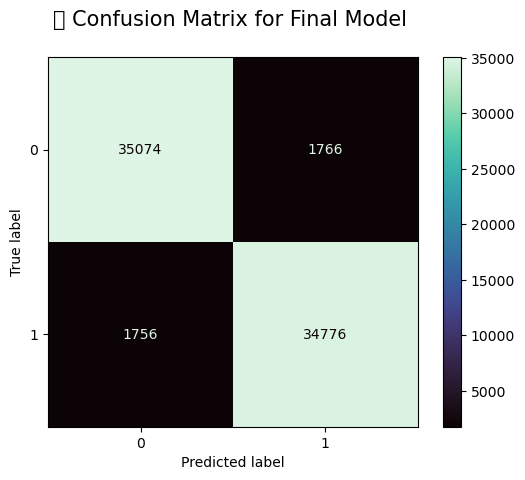

In [70]:
from sklearn import metrics
plt.style.use('default')
class_names = df.columns
metrics.plot_confusion_matrix(final_model, x_test, y_test, cmap='mako')
plt.title('\t Confusion Matrix for Final Model \n',fontsize=15)
plt.show()

With the help of above confusion matrix I am able to understand the number of times I got the correct outputs and the number of times my ML model missed to provide the correct prediction (depicting in the black boxes).

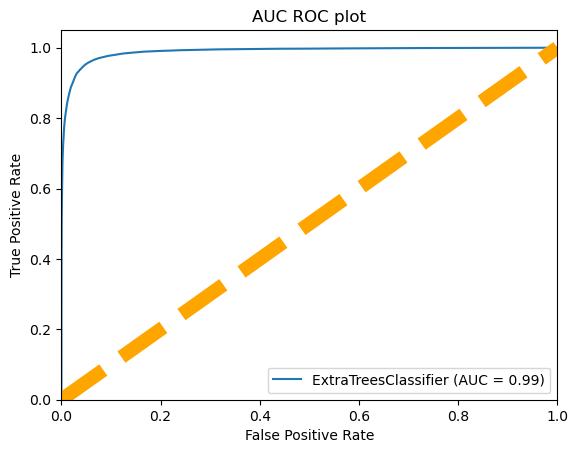

In [80]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(final_model, x_test, y_test)
plt.plot([0,1],[0,1],color = 'orange',lw = 10, linestyle = '--')
plt.title("AUC ROC plot")
plt.xlim([0.0,1.0]) # limitation
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


## Saving the Model

In [85]:
## using joblib to save the model
import joblib
filename =  "MCreditDefaulter_pred.pkl"
joblib.dump(final_model, filename)

['MCreditDefaulter_pred.pkl']

In [86]:
import numpy as np
a = np.array(y_test)
predicted = np.array(final_model.predict(x_test))
df_com = pd.DataFrame({'Original':a,'Predicted':predicted},index = range(len(a)))
df_com.sample(20)
# comparison of predicted and original value

,Original,Predicted
52874,1,1
38229,1,1
43946,1,1
34688,1,1
41584,1,1
3016,0,0
48705,0,0
70994,0,1
49662,0,0
43646,1,1


# ----------------------------------------------------------------------------------------------
##  **************************************THANKYOU*****************************************
# ----------------------------------------------------------------------------------------------